# Исследование данных о продажах компьютерных игр

**Описание проекта**  
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

**Цель исследования:**  
Выявить определяющие успешность игры закономерности  

**Этапы выполнения проекта:**  
Этап 1. Обзор файла с данными и изучение общей информации  
Этап 2. Предобработка  данных  
- Замена названий столбцов (приведение к нижнему регистру).  
- Преобразование данных в нужные типы.   
- Обработка пропусков при необходимости, описание причин, которые могли привести к пропускам.   
- Обработка значений 'tbd' в столбце с оценкой пользователей.   
- Подсчет суммарных продаж игр во всех регионах и занесение их в отдельный столбец.  

Этап 3. Исследовательский анализ данных  
- Анализ количества выпущенных игр в разные годы.  
- Анализ изменения продаж по платформам. Определение платформ с наибольшими суммарными продажами, построение графиков распределения по годам.   
- Определение характерного срока, за который появляются новые и исчезают старые платформы.  
- Выбор данных за соответствующий актуальный период, которые помогут построить прогноз на 2017 год.  
- Определение платформ, которые лидируют по продажам. Выбор несколько потенциально прибыльных платформ.  
- Постройте графика boxplot по глобальным продажам игр в разбивке по платформам. Описание результата.  
- Анализ того, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и расчет корреляции между отзывами и продажами. Формулировка выводов.  
- Соотнесение выводов с продажами игр на других платформах.  
- Анализ распределения игр по жанрам. Определение самых прибыльных жанров, выделение жанров с высокими и низкими продажами.  

Этап 4. Составление портрета пользователя каждого региона  
- Определение для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5). Описание различия в долях продаж.  
- Самые популярные жанры (топ-5). Пояснение различий.  
- Анализ влияния рейтинга ESRB на продажи в отдельном регионе.  

Этап 5. Проверка гипотез  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Этап 6. Общий вывод  

## Открытие файла и изучение информации в таблице

In [1]:
# импортируем нужные для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st
# откроем файл с данными и выведем на экран первые 10 строк
data = pd.read_csv('/datasets/games.csv', sep = ',')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# вывод основной информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице с данными 16 715 строк. Часть полей таблицы содержит пропуски, которые будут рассматриваться в разделе "Предобработка данных".  
Описание данных таблицы:  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

array([[<Axes: title={'center': 'Year_of_Release'}>,
        <Axes: title={'center': 'NA_sales'}>],
       [<Axes: title={'center': 'EU_sales'}>,
        <Axes: title={'center': 'JP_sales'}>],
       [<Axes: title={'center': 'Other_sales'}>,
        <Axes: title={'center': 'Critic_Score'}>]], dtype=object)

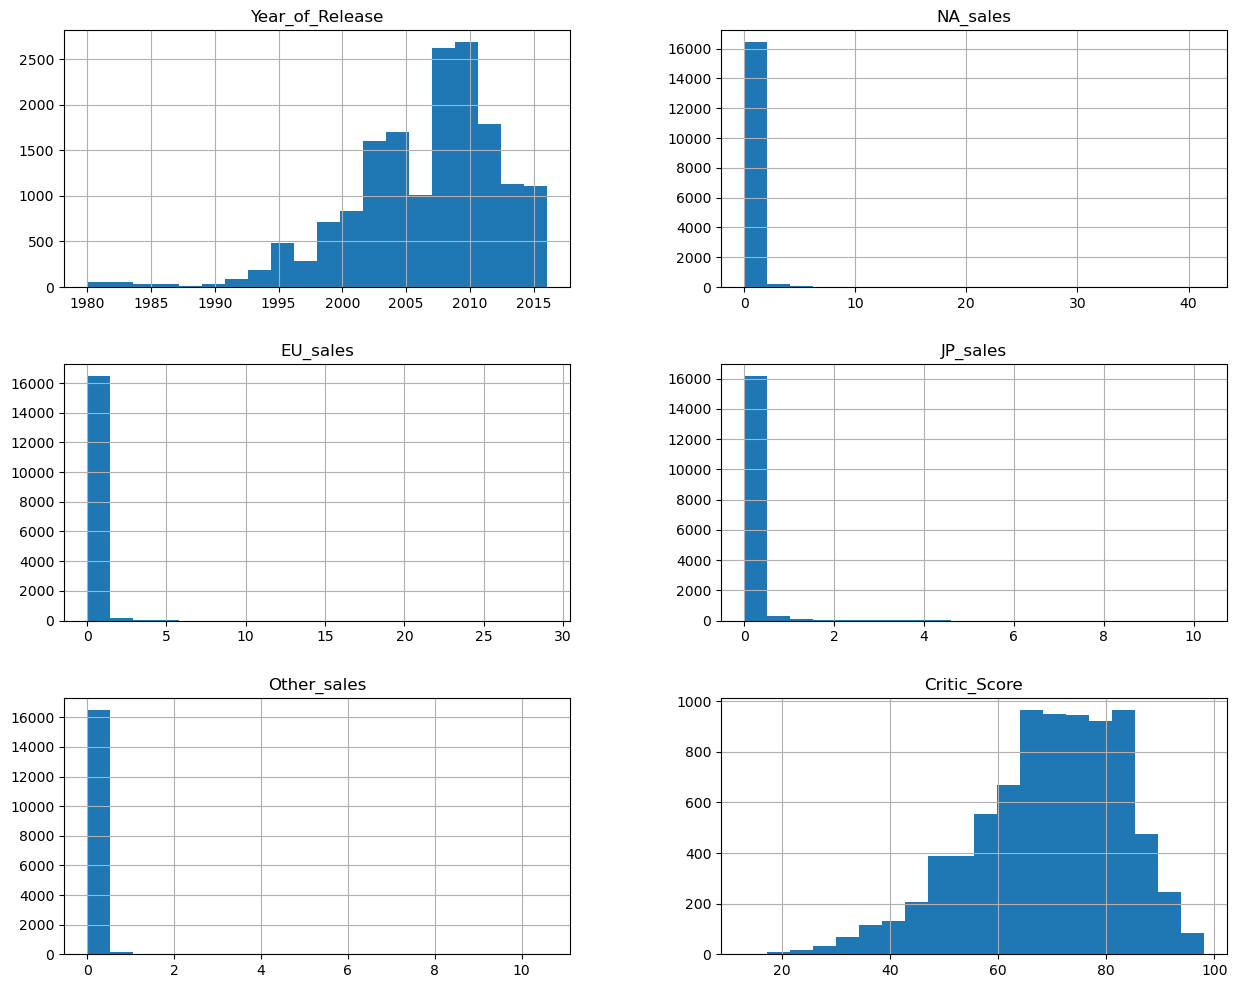

In [3]:
data.hist(figsize=(15, 12), bins=20)

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Предобработка данных

In [5]:
# приведем названия столбцов к строчным буквам
data.columns = data.columns.str.lower()

In [6]:
# проверим данные таблицы на наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты строк в таблице отсутствуют.

### Заполнение пропусков

In [7]:
# выведем количество пропущенных значений для каждого столбца
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах таблицы 'name' и 'genre' присутсвуют всего по два пропущенных значения. Выведем соответствующие строки на экран.

In [8]:
data.query('name.isna() or genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим строки в которых имеются пропущенные значения в столбцах 'name' и 'genre'.

In [9]:
data = data.dropna(subset=['name','genre'])

In [10]:
# в столбцах 'year_of_release', 'critic_score', 'user_score', 'rating' имеется достаточно много пропусков.
# выведем уникальные значения данных столбцов
for i in ['year_of_release', 'critic_score', 'user_score', 'rating']:
    print(i, data[i].unique())

year_of_release [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
critic_score [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
user_score ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '

Данные, содержащиеся в полях с рейтингом игры, относятся к категориальным пременным. Заполнять пропущенные данные в указанном столбце нецелесообразно.  
Наличие пропусков в поле, содержащем данные о рейтинге от организации ESRB, может быть связано с тем, что не всем играм присваивались определенные рейтинги.
Количество пропусков в полях содержащих данные об оценках критиков и пользователей велико - 51,3% и 40,1% от общего количества строк соответственно.  
Заполнение пропусков в данных столбцах средним или медианным значением может привести к существенному искажению результатов анализа.  
Наличие пропусков в полях, содержащих данные о рейтингах критиков и пользователей, может быть связано с тем, что раньше не было систем выставления оценки игр пользователями и критиками.

В столбце 'user_score' присутствует значение 'tbd'. Данная аббревиатура означает to be determined, то есть "будет определено". Заменим указанные значения на пропуски. 

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [12]:
# заменим пропущенные значения в поле, содержащем информацию о рейтинге от организации ESRB, значением "unknown"
data['rating'] = data['rating'].fillna('unknown')

### Изменение типов данных

В целях проведения исследования изменим тип данных в ряде полей таблицы.  
В полях таблицы 'year_of_release' и 'critic_score' преобразуем тип данных из строчных значений в целочисленные.  
В поле таблицы 'user_score' преобразуем тип данных из строчных значений в вещественные числа.  
Для исключения ошибок при преобразовании данных заменим пропущенные значения в столбцах 'year_of_release' и 'critic_score' на число 555.

In [13]:
data['year_of_release'] = data['year_of_release'].fillna(555).astype('int')

In [14]:
data['user_score'] = data['user_score'].astype('float')

In [15]:
data['critic_score'] = data['critic_score'].fillna(555).astype('int')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


### Добавление в таблицу нового столбца

Посчитаем суммарные продажи во всех регионах и занесем их в отдельный столбец

In [17]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'jp_sales']].sum(axis=1)

In [18]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,77.86
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,555,NaN,unknown,46.28
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,36.02
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,33.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,555,NaN,unknown,40.60
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,555,NaN,unknown,33.90
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,33.42
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,29.00
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,30.78
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,555,NaN,unknown,28.12


Вывод: мы привели названия столбцов к строчному регистру, проверили данные на наличие явных дубликатов, удалили строки, в которых имеются пропущенные значения в столбцах с названием игры и жанра.  
В столбце 'user_score' заменили значение 'tbd' ("будет определено") на пропуски.  
Заменили пропущенные значения в поле, содержащем информацию о годе выпуска игры, медианными значениями годов выпуска данной игры на других платформах.
Количество пропусков в полях содержащих данные об оценках критиков и пользователей велико - 51,3% и 40,1% от общего количества строк соответственно.
Заполнение пропусков в данных столбцах средним или медианным значениями не производилось, так как это может привести к существенному искажению результатов анализа.
В полях таблицы 'year_of_release' и 'user_score' преобразовали тип данных из строчных значений в целочисленные.  
В поле таблицы 'user_score' преобразовали тип данных из строчных значений в вещественные числа.  
Посчитали суммарные продажи игр во всех регионах и занесли результаты их в отдельный столбец таблицы.  
Пропуски могут быть вызваны разными факторами. 
Наличие пропусков в поле с данными о годе выпуска игр может быть вызвано отсутствием информации либо техническими ошибками при выгрузке данных.  
Наличие пропусков в поле с данными о рейтингах игр от организации ESRB, может быть связано с тем, что не всем играм присваивались данные рейтинги.
Наличие пропусков в полях с данными о рейтингах игр от критиков и пользователей, может быть связано с тем, что раньше не было систем выставления оценки игр критиками и пользователями.

## Исследовательский анализ данных

### Выпуск игр по годам

In [19]:
# сформируем сводную таблицу с группировкой игр по годам
data_by_year = data.query('year_of_release != 555').pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().sort_values('year_of_release')

[Text(0.5, 1.0, 'Количество выпущенных игр по годам'),
 Text(0.5, 0, 'год выпуска'),
 Text(0, 0.5, 'количество выпущенных игр, ед.')]

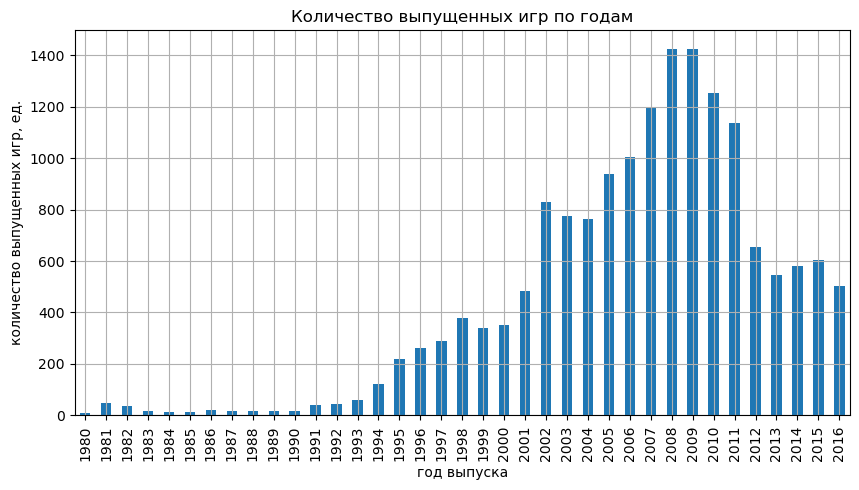

In [20]:
# построим график, показывающий количество выпущенных игр по годам 
data_by_year.plot(kind='bar', x='year_of_release', y='name', figsize=(10, 5), grid=True, legend=False) \
.set(title='Количество выпущенных игр по годам', xlabel='год выпуска', ylabel='количество выпущенных игр, ед.')

Как видно из графика, суммарно для всех игровых платформ до 1995 года выпускалось менее 200 игр в год. Отметка в 400 игр преодолена в 2001 году.  
В 2002 году количество выпущенных игр превысило 800. Наибольшее количество игровых релизов наблюдается в период с 2006 по 2011 гг.  
После этого, в период с 2012 по 2016 гг. ежегодное количество релизов снижается и колеблется в районе 500-600.  
Для анализа выпуска игр целесообразно использовать данные начиная с 1995 года.

### Выпуск игр по платформам

In [21]:
# сформируем сводную таблицу с группировкой количества проданных игр по платформам
data_actual_period_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values('total_sales', ascending = False)

[Text(0.5, 1.0, 'Количество проданных игр в разрезе платформ'),
 Text(0.5, 0, 'игровая платформа'),
 Text(0, 0.5, 'количество проданных копий игр, млн.шт.')]

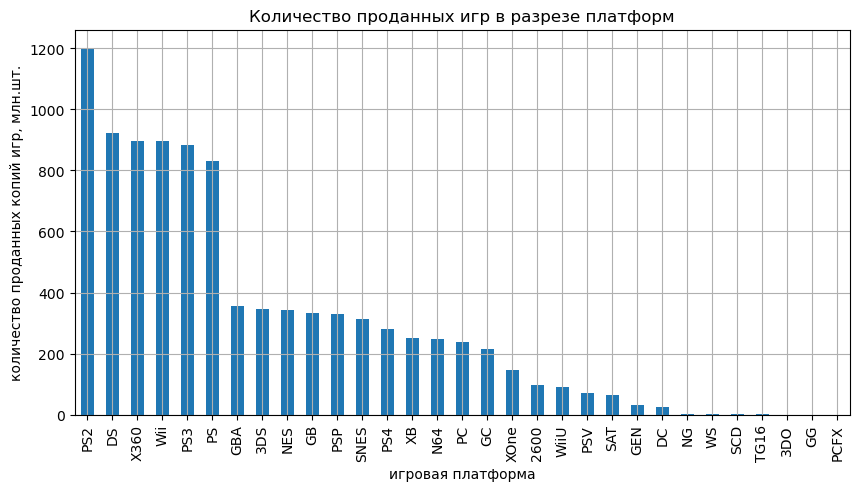

In [22]:
# построим график, показывающий количество выпущенных игр для разных платформ 
data_actual_period_platform.plot(kind='bar', x='platform', y='total_sales', figsize=(10, 5), grid=True, legend=False) \
.set(title='Количество проданных игр в разрезе платформ', xlabel='игровая платформа', ylabel='количество проданных копий игр, млн.шт.')

Наибольшее количество игр было продано для следующих платформ: Sony PlayStation 2, Nintendo DS, Microsoft Xbox 360, Nintendo Wii, Sony PlayStation 3, Sony PlayStation.  
Для каждой из данных платформ количество проданных игр за весь анализируемый период превысило 800 млн. копий.  
Для 11-ти платформ количество проданных копий игр составило от 200 до 400 млн., для остальных менее 200 млн. копий.

### Объемы продаж игр для крупнейших платформ по годам релиза

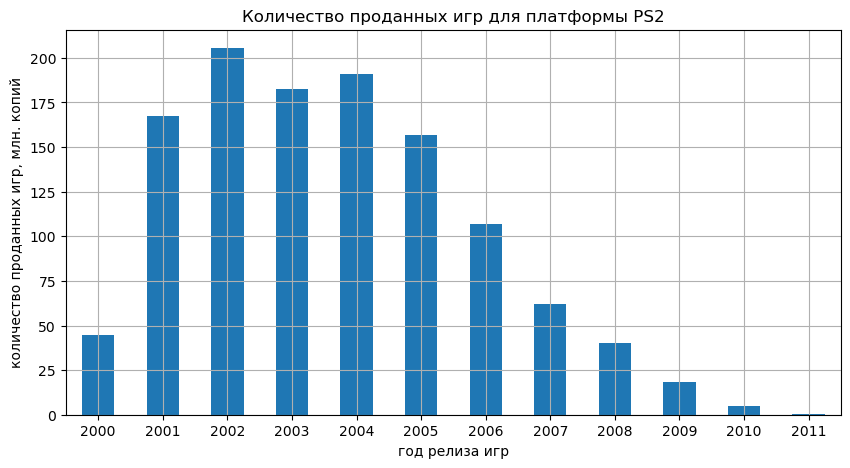

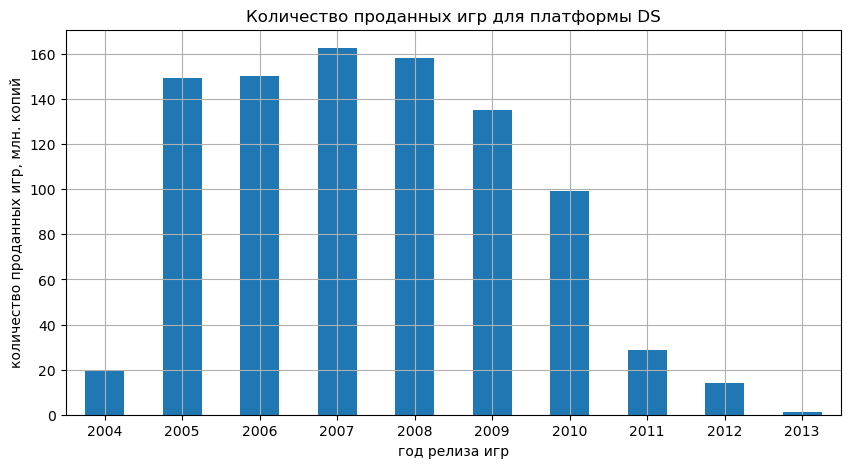

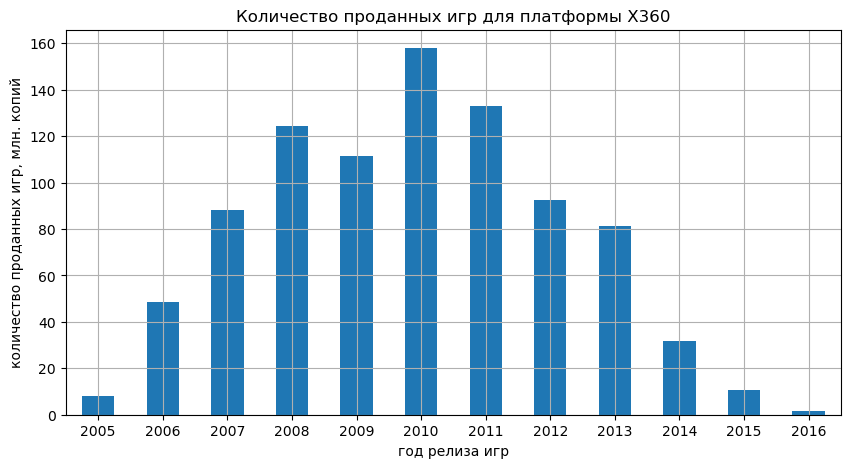

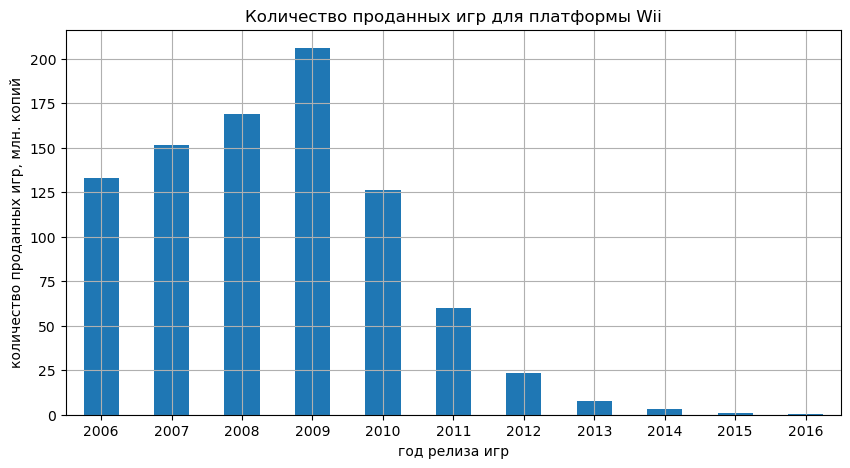

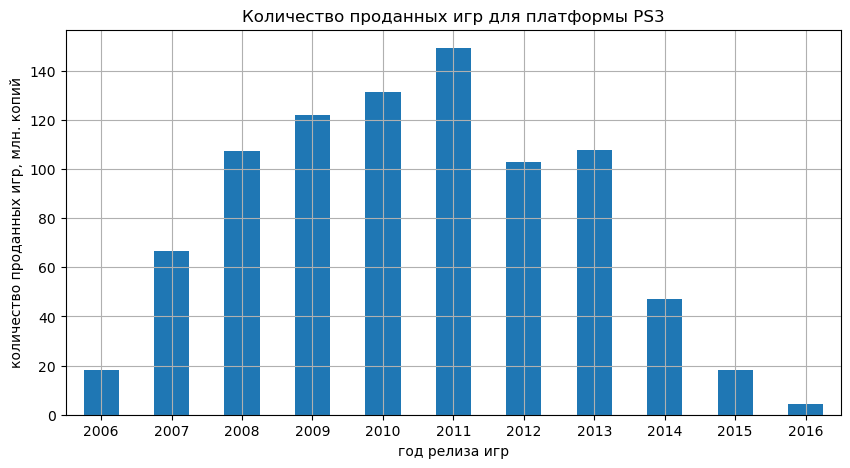

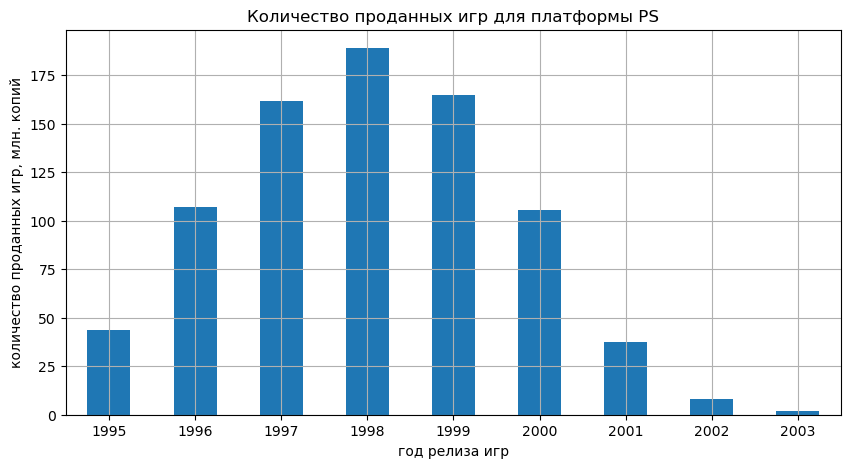

In [23]:
# построим графики количества проданных игр для крупнейших платформ по годам релиза игр
top_platforms=['PS2', 'DS', 'X360', 'Wii', 'PS3', 'PS']
for top_platform in top_platforms:
    data.query('platform == @top_platform and year_of_release >= 1995')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().sort_values('year_of_release')\
    .plot(kind='bar', x='year_of_release', y='total_sales', figsize=(10, 5), grid=True, legend=False, rot=0) \
    .set(title=f'Количество проданных игр для платформы {top_platform}', xlabel='год релиза игр', ylabel='количество проданных игр, млн. копий')
    

Исходя из данных, представленных на вышеприведенных графиках, средний срок жизни игровой платформы составляет около 10 лет.  
Все платформы, для которых было продано наибольшее количество копий игр за весь период анализа, либо закончили свой жизненный цикл либо подошли к его окончанию.  
При этом рост количества проданных игр для одной платформы продолжается в течение 4-5 лет.  
Таким образом, для того, чтобы спрогнозировать объем продаж игр для разных платформ на 2017 год, нужно использовать данные за период с 2013 по 2016 гг.

### Объемы продаж игр за период 2013 - 2016 гг.

Проведем анализ платформ на предмет потенциальной прибыльности в 2017 году исходя из данных за 2013-2016 гг.

In [24]:
# выберем данные о продажах игр, выпущенных начиная с 2013 года, и сгруппируем их по платформам
data_actual_period_platforms = data.query('year_of_release >= 2013')\
.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values('total_sales', ascending = False)
data_actual_period_platforms                                     

,platform,total_sales
4,PS4,281.75
0,3DS,204.78
3,PS3,178.01
10,XOne,145.39
9,X360,125.20
8,WiiU,70.82
6,PSV,48.32
2,PC,36.47
7,Wii,12.59
5,PSP,6.75


[Text(0.5, 1.0, 'Количество проданных игр для платформ за 2013-2016 гг.'),
 Text(0.5, 0, 'платформа'),
 Text(0, 0.5, 'количество проданных игр, млн. копий')]

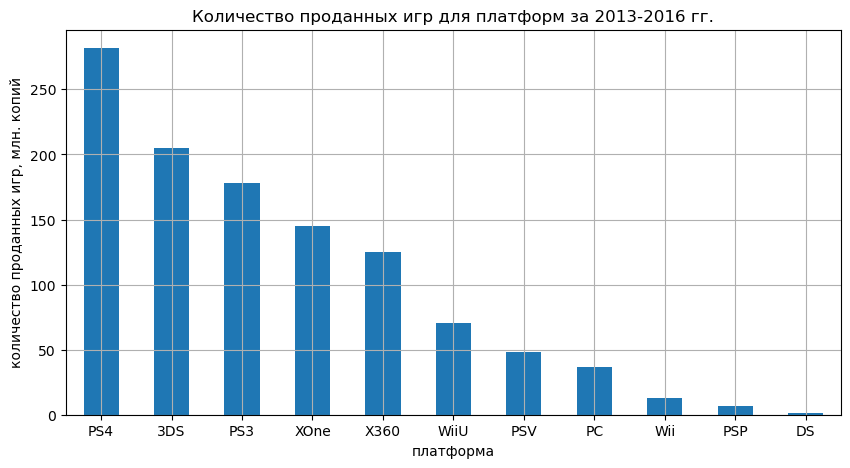

In [25]:
# построим график продаж игр в разрезе платформ за период с 2013 г. по 2016 г.
data_actual_period_platforms.plot(kind='bar', x='platform', y='total_sales', figsize=(10, 5), grid=True, legend=False, rot=0) \
.set(title='Количество проданных игр для платформ за 2013-2016 гг.', xlabel='платформа', ylabel='количество проданных игр, млн. копий')

По объемам продаж игр, выпущенных за последние 4 года (2013 - 2016 гг.), лидирующие позиции занимают платформы Sony PlayStation 4, Nintendo 3DS, Sony PlayStation 3, Microsoft XOne.  
Наименьшее количество проданных игр приходится на платформы Nintendo Wii, Sony PSP, Nintendo DS.

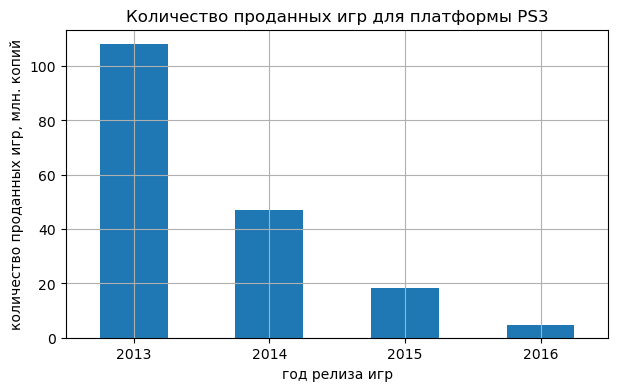

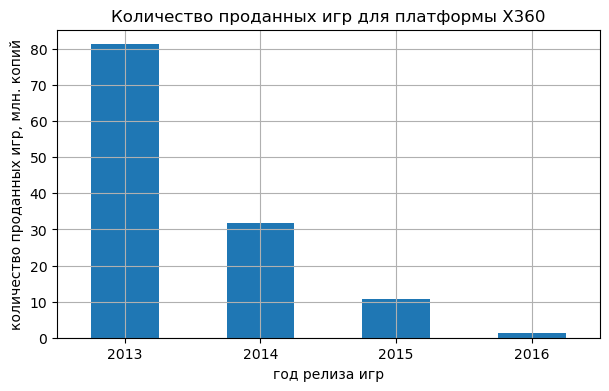

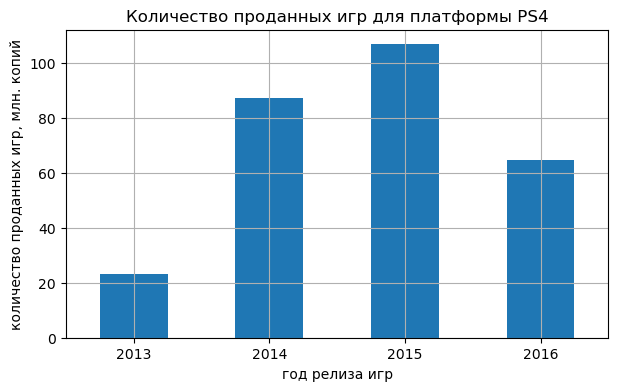

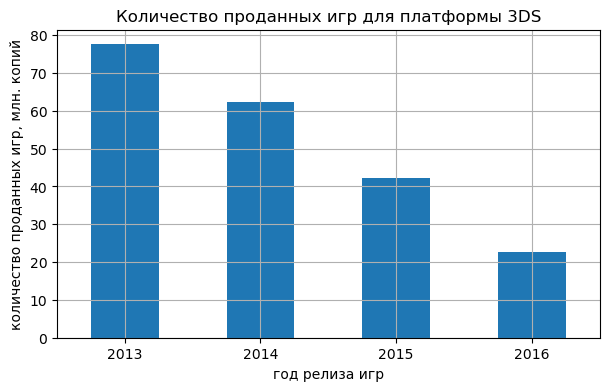

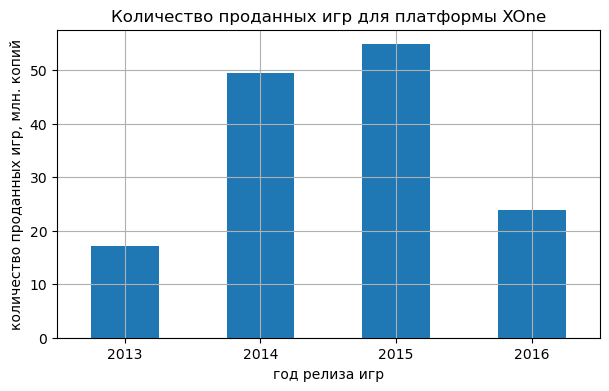

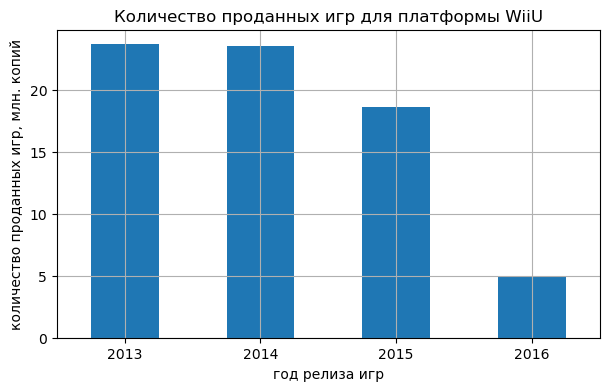

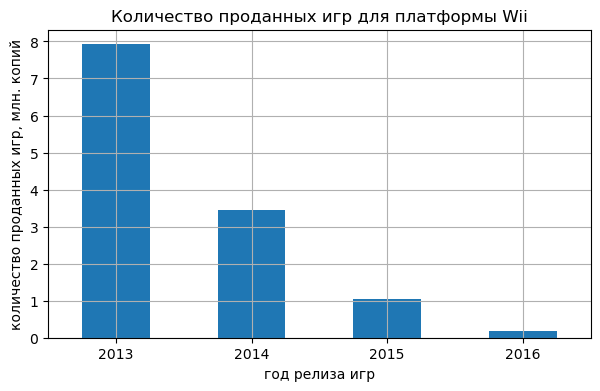

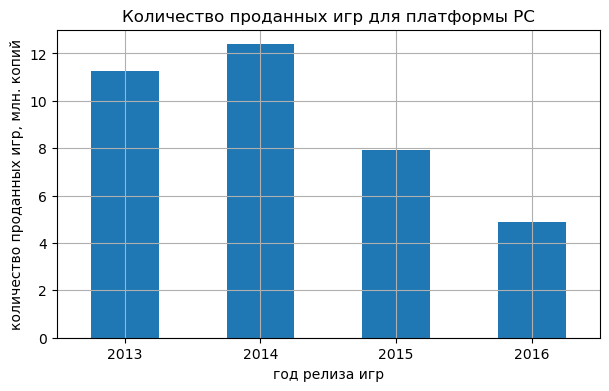

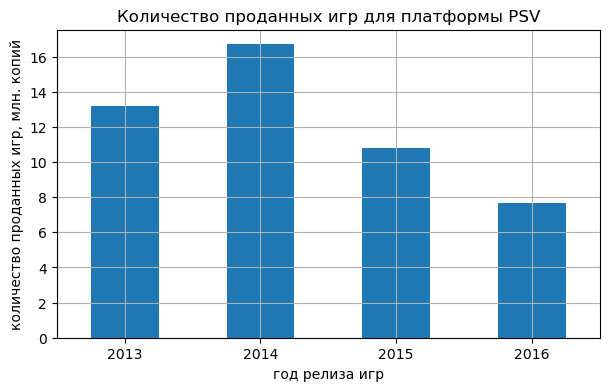

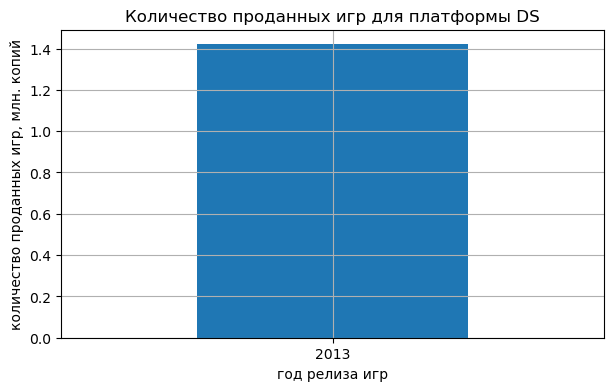

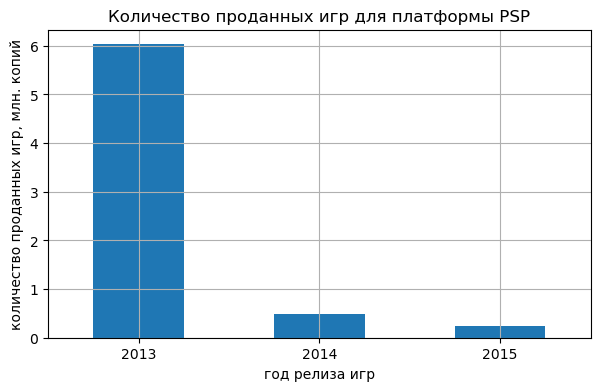

In [26]:
# построим графики продаж игр для каждой платформы за пеирод 2013 - 2016 гг.
data_actual_period = data.query('year_of_release >= 2013')
for actual_platform in data_actual_period['platform'].unique():
    data_actual_period.query('platform == @actual_platform').reset_index().sort_values('year_of_release')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(7, 4), grid=True, legend=False, rot=0)\
    .set(title=f'Количество проданных игр для платформы {actual_platform}', xlabel='год релиза игр', ylabel='количество проданных игр, млн. копий')

Объемы продаж игр для всех платформ снижаются в 2016 году по сравнению с предыдущим годом.  
При этом продаж игр для платформ PSP и DS в 2016 году не было. Для платформ PS3, X360, Wii продажи были минимальными.   
Для остальных платформ период снижения составляет: PS4, XOne - 1 год, WiiU, PSV, PC - 2 года, 3DS - 3 года.  
Исходя из объема продаж за 2016 год и продолжительности снижения объемов продаж, наиболее привлекательно для реализации игр выглядят платформы PS4 и XOne.

### Распределение продаж игр за период 2013 - 2016 гг. по платформам

[Text(0.5, 1.0, 'Распределение продаж игр по платформам за 2013 - 2016 гг.'),
 Text(0.5, 0, 'платформы'),
 Text(0, 0.5, 'объем продаж, млн. копий')]

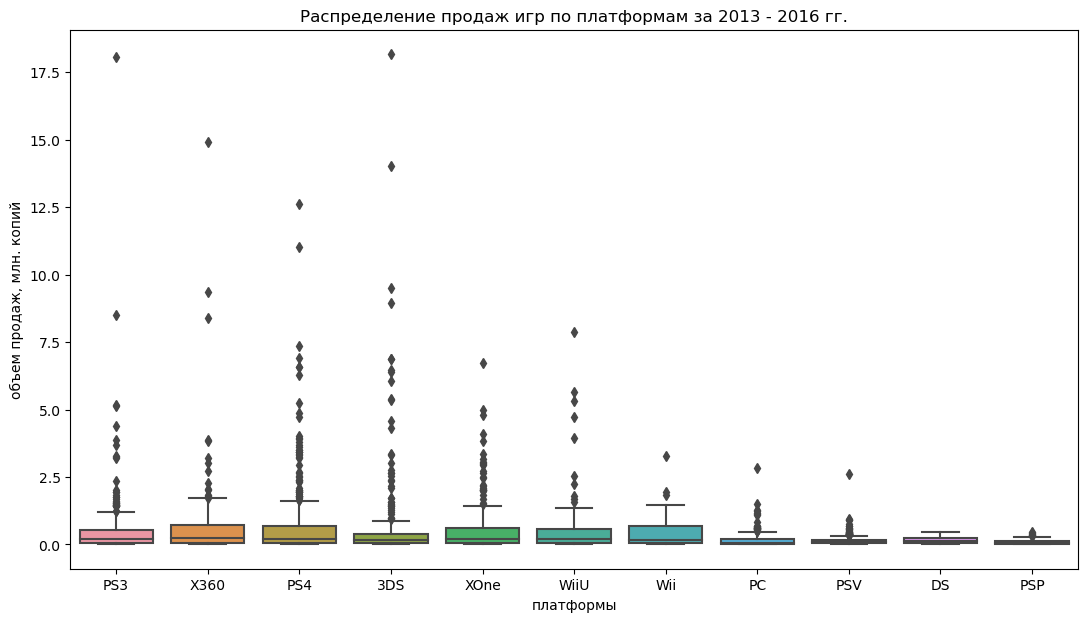

In [27]:
# выведем график распределения объемов продаж по игровым платформам за период 2013 - 2016 гг.
data_actual_period = data.query('year_of_release >= 2013')
plt.figure(figsize=(13, 7))
sns.boxplot(data=data_actual_period, x='platform', y='total_sales') \
.set(title = 'Распределение продаж игр по платформам за 2013 - 2016 гг.', xlabel = 'платформы', ylabel = 'объем продаж, млн. копий')

[Text(0.5, 1.0, 'Распределение продаж игр по платформам за 2013-2016 гг.'),
 Text(0.5, 0, 'платформы'),
 Text(0, 0.5, 'объем продаж, млн. копий'),
 (0.0, 2.5)]

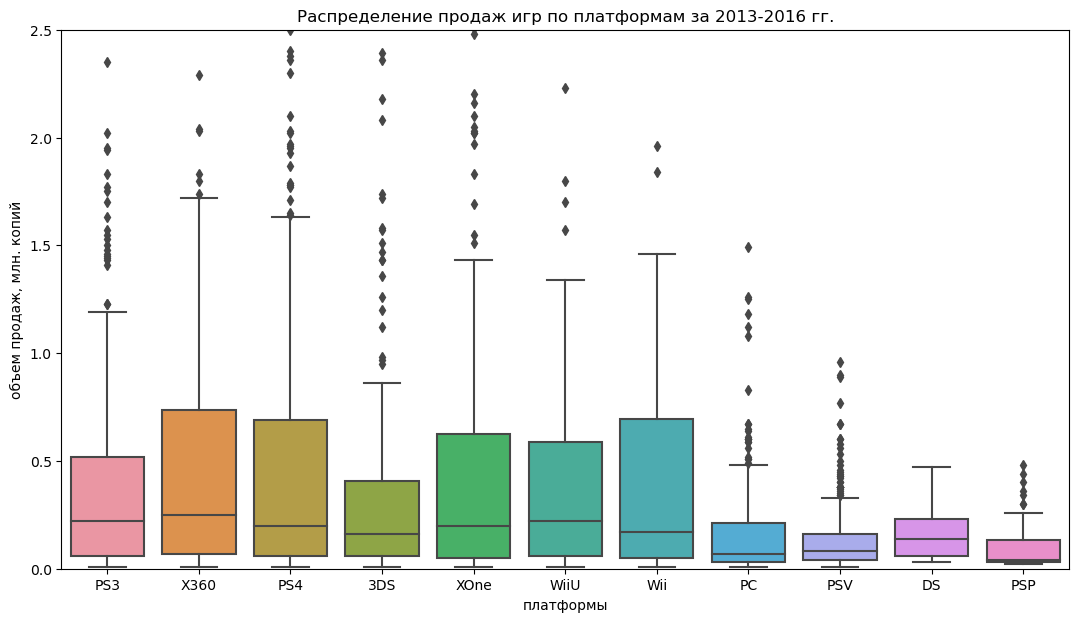

In [28]:
# выведем предыдущий график с ограничением значения по оси y в размере 2,5 млн. проданных копий
plt.figure(figsize=(13, 7))
sns.boxplot(data=data_actual_period, x='platform', y='total_sales') \
.set(title = 'Распределение продаж игр по платформам за 2013-2016 гг.', xlabel = 'платформы', ylabel = 'объем продаж, млн. копий', ylim=(0,2.5))

In [29]:
data_actual_period_pivot = data_actual_period.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
data_actual_period_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,77.54,1.42,11.27,107.98,23.06,6.03,13.19,7.92,23.69,81.25,17.23
2014,62.44,NaN,12.38,47.13,87.19,0.48,16.69,3.45,23.54,31.69,49.40
2015,42.27,NaN,7.93,18.37,106.75,0.24,10.78,1.05,18.67,10.86,54.84
2016,22.53,NaN,4.89,4.53,64.75,NaN,7.66,0.17,4.92,1.40,23.92


Исходя из приведенных данных, наблюдается снижение продаж игр, выпущенных в 2016 году, для всех игровых платформ.  
Данное обстоятельство может быть связано с тем, что 2016 год является последним представленным периодом, за который имеются данные о продажах. При этом, возможно, что игры, вышедшие в 2016 году, еще могут продаваться в последующих годах. Также следует учитывать рост популярсности игр, выпускаемых для операционных систем для мобильных устройств (android, iOS). Информация о таких играх отсутствует.  
Наибольший объем наблюдается у игр, выпущенных для платформ 3DS, PS4 и Xone. Несмотря на снижение продаж в 2016 году, пик продаж игр для данных платформ прошел сравнительно недавно.  
Поэтому потенциал у данных платформ наиболее сильный по сравнению с остальными.

In [30]:
for i in data_actual_period['platform'].unique():
    data_actual_period_i = data_actual_period.query('platform == @i')
    print(i)
    print(data_actual_period_i['total_sales'].describe())

PS3
count    345.000000
mean       0.515971
std        1.257291
min        0.010000
25%        0.060000
50%        0.220000
75%        0.520000
max       18.070000
Name: total_sales, dtype: float64
X360
count    186.000000
mean       0.673118
std        1.522368
min        0.010000
25%        0.070000
50%        0.250000
75%        0.735000
max       14.920000
Name: total_sales, dtype: float64
PS4
count    392.000000
mean       0.718750
std        1.393257
min        0.010000
25%        0.060000
50%        0.200000
75%        0.690000
max       12.610000
Name: total_sales, dtype: float64
3DS
count    303.000000
mean       0.675842
std        1.819362
min        0.010000
25%        0.060000
50%        0.160000
75%        0.405000
max       18.170000
Name: total_sales, dtype: float64
XOne
count    247.000000
mean       0.588623
std        0.944760
min        0.010000
25%        0.050000
50%        0.200000
75%        0.625000
max        6.720000
Name: total_sales, dtype: float64
WiiU
cou

Наибольший разброс значений по объемам продаж наблюдается у игр, выпущенных для платформ 3DS, PS4 и X360. Наименьший разброс - у игр для платформ PSV, DS, PSP.  
Наибольшее среднее значение наблюдается у игр для платформ: X360 - 0,67 млн, копий, PS4 - 0,72 млн., 3DS - 0,68 млн.  
Наибольшее медианное значение наблюдается у игр для платформ: PS3 и WiiU - 0,22 млн. копий, X360 - 0,25 млн., PS4 и Xone - 0,2 млн. 

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

In [31]:
# рассчитаем коэффициенты корреляции между отзывами пользователей и критиков и объемами продаж игр в разрезе платформ за период 2013 -2016 гг.
data_actual_period_corr = data_actual_period[['platform', 'critic_score', 'user_score', 'total_sales']].query('critic_score !=555') 
for actual_platform in data_actual_period_corr['platform'].unique():
    corr_ratio = data_actual_period_corr.query('platform == @actual_platform').corr()
    print(actual_platform)
    print(corr_ratio)

PS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.599920     0.343601
user_score        0.599920    1.000000     0.036257
total_sales       0.343601    0.036257     1.000000
X360
              critic_score  user_score  total_sales
critic_score      1.000000    0.520946     0.350696
user_score        0.520946    1.000000    -0.005185
total_sales       0.350696   -0.005185     1.000000
PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.409392
user_score        0.557654    1.000000    -0.023643
total_sales       0.409392   -0.023643     1.000000
WiiU
              critic_score  user_score  total_sales
critic_score      1.000000    0.721313     0.358327
user_score        0.721313    1.000000     0.400107
total_sales       0.358327    0.400107     1.000000
XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.417337
user_score        0.472462    1.000000   

C:\Users\Павел\AppData\Local\Temp\ipykernel_9996\894017545.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ratio = data_actual_period_corr.query('platform == @actual_platform').corr()
C:\Users\Павел\AppData\Local\Temp\ipykernel_9996\894017545.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ratio = data_actual_period_corr.query('platform == @actual_platform').corr()
C:\Users\Павел\AppData\Local\Temp\ipykernel_9996\894017545.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence 

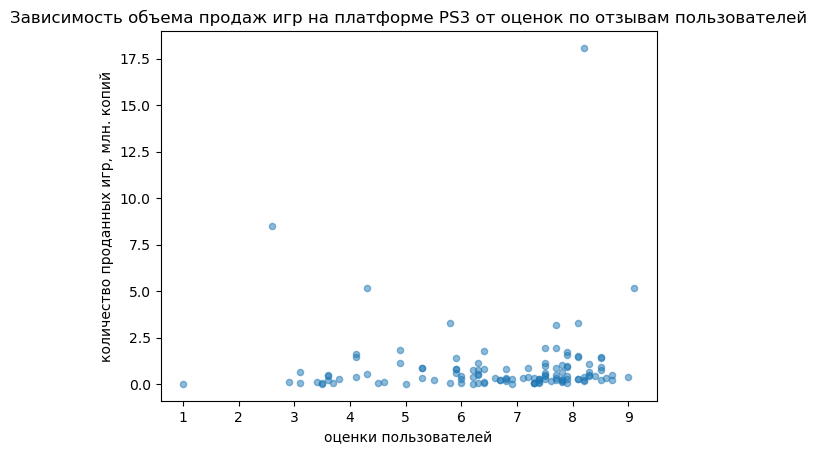

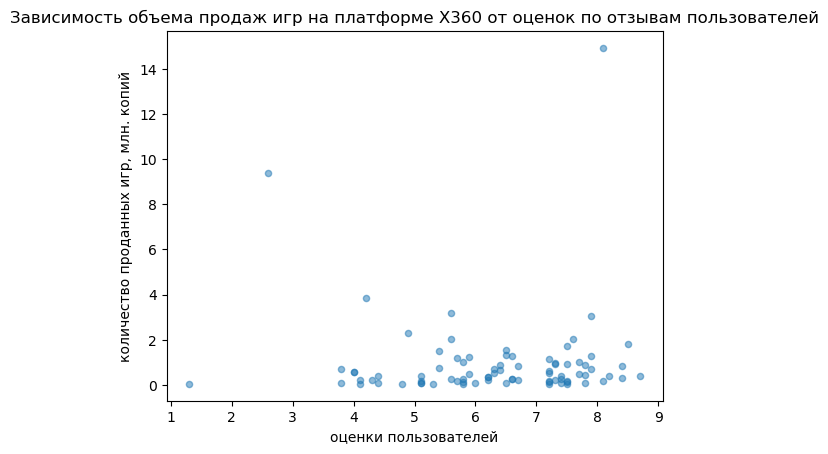

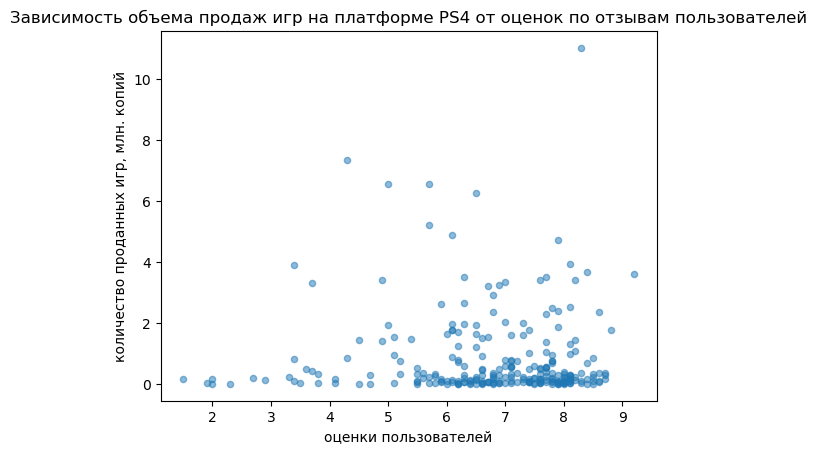

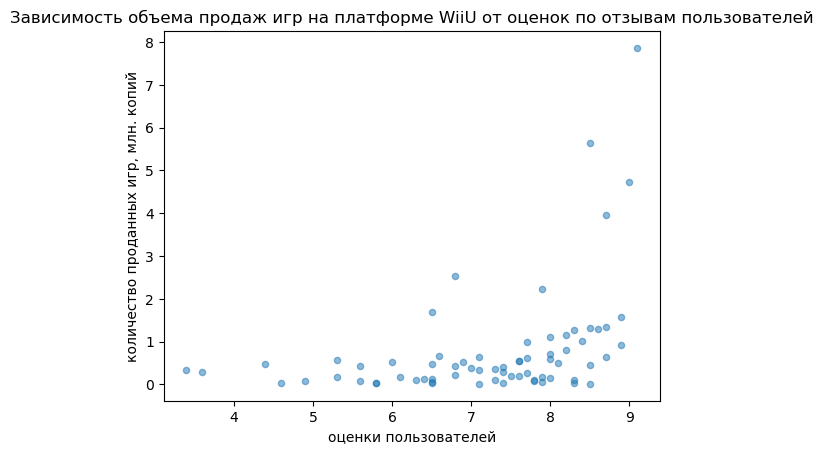

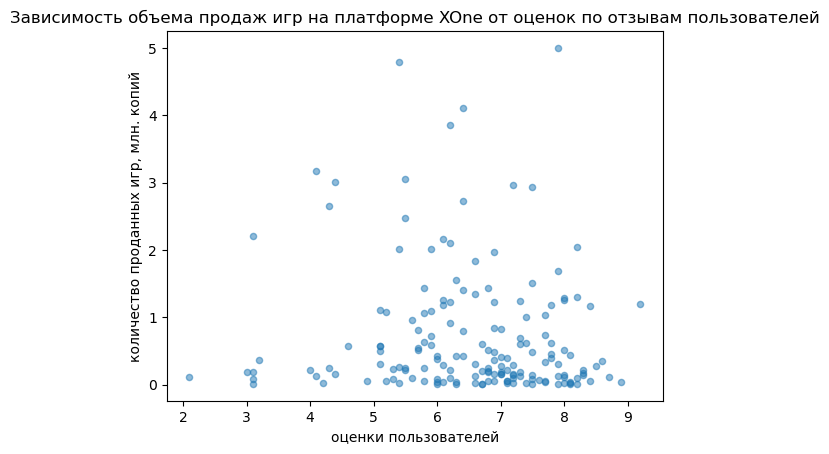

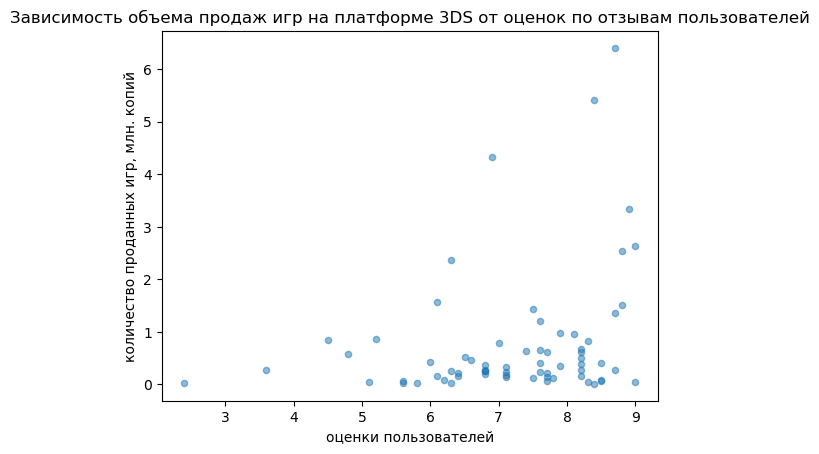

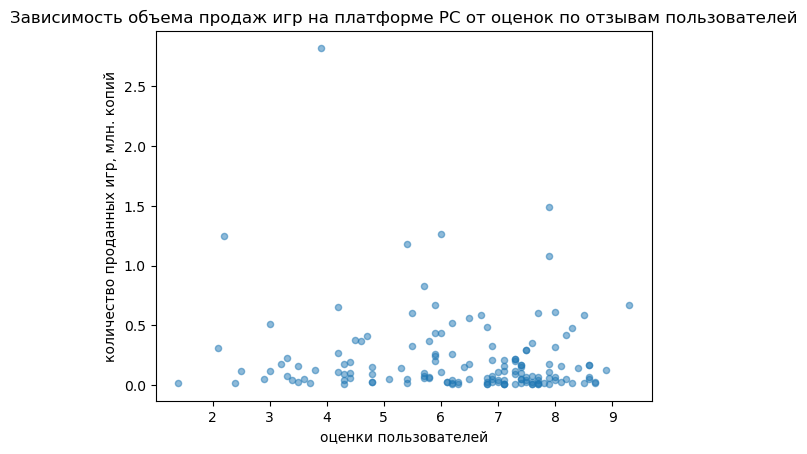

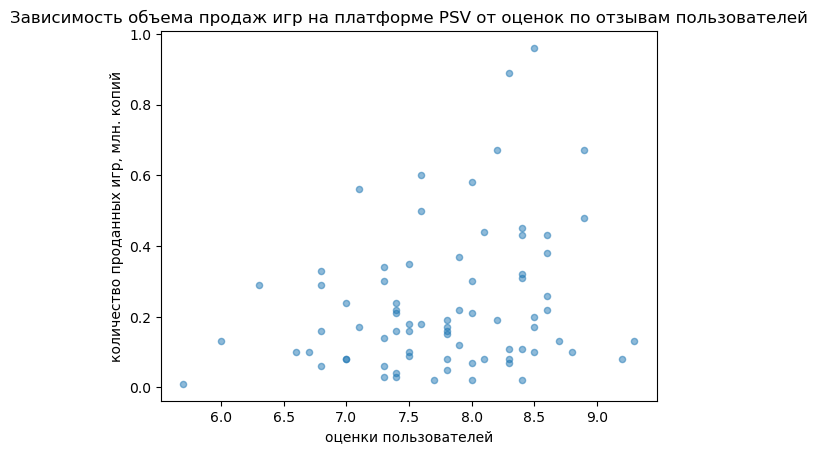

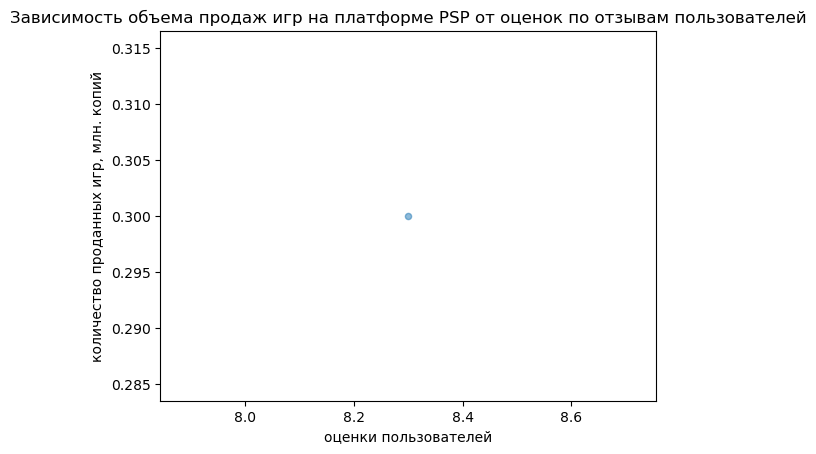

In [32]:
# выведем диаграммы рассеяния по отзывам пользователей для всех платформ за период 2013 -2016 гг.
for actual_platform in data_actual_period_corr['platform'].unique():
    data_actual_period_corr.query('platform == @actual_platform') \
.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5) \
.set(title=f'Зависимость объема продаж игр на платформе {actual_platform} от оценок по отзывам пользователей', xlabel='оценки пользователей', ylabel='количество проданных игр, млн. копий') 

Корреляция между объемами продаж игр и оценкой игр на основе отзывов пользователей, слабая либо вовсе отсутствует.  
Коэффициент корреляции по всем платформам в указанный период находится в диапазоне от -0,11 до 0,4. 

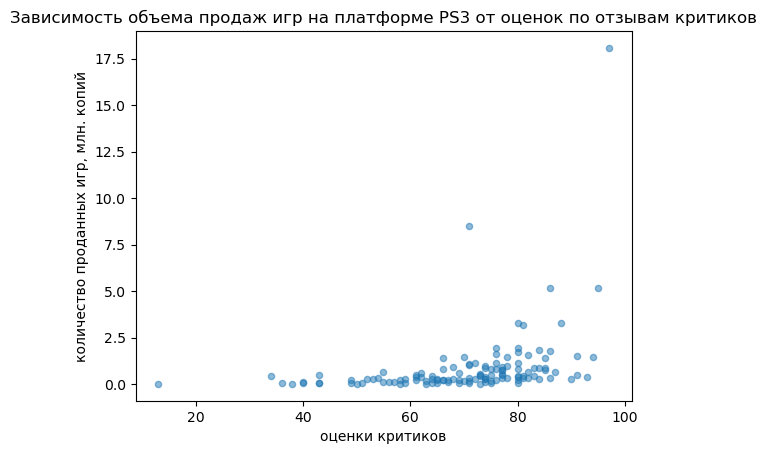

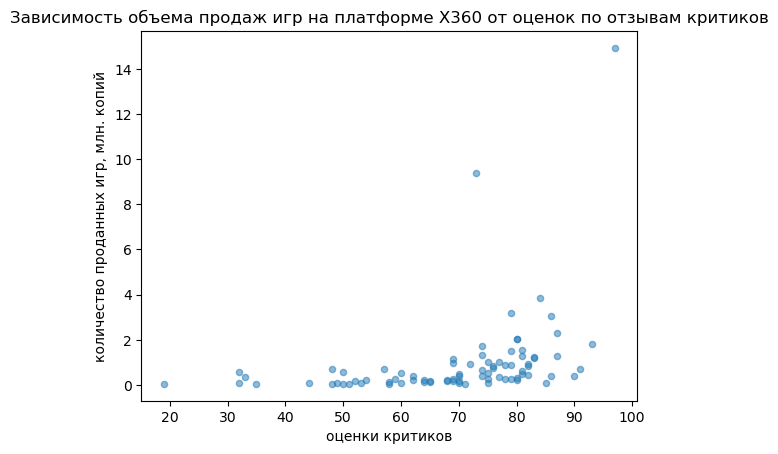

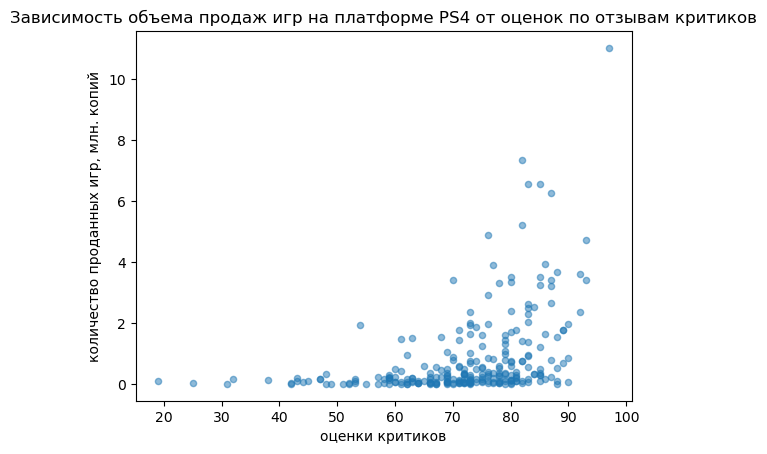

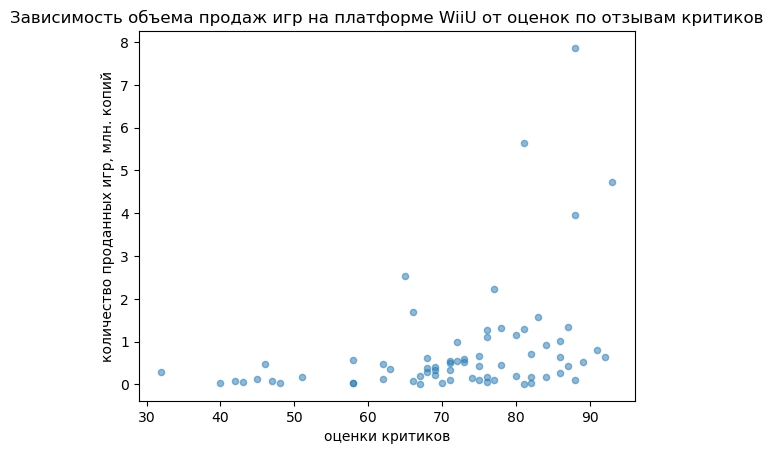

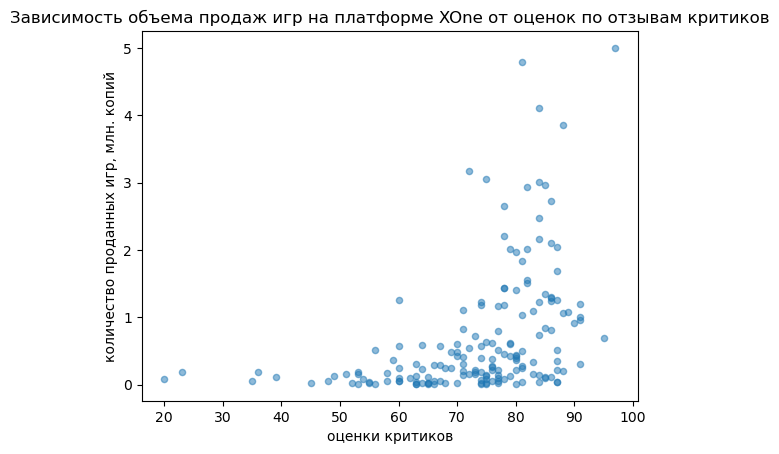

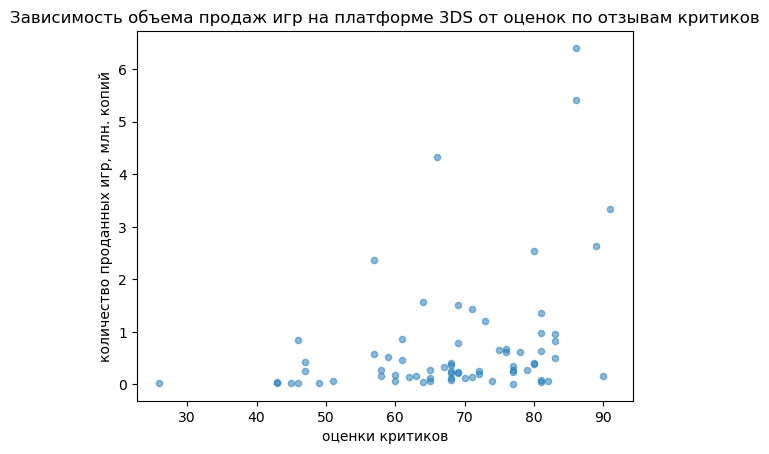

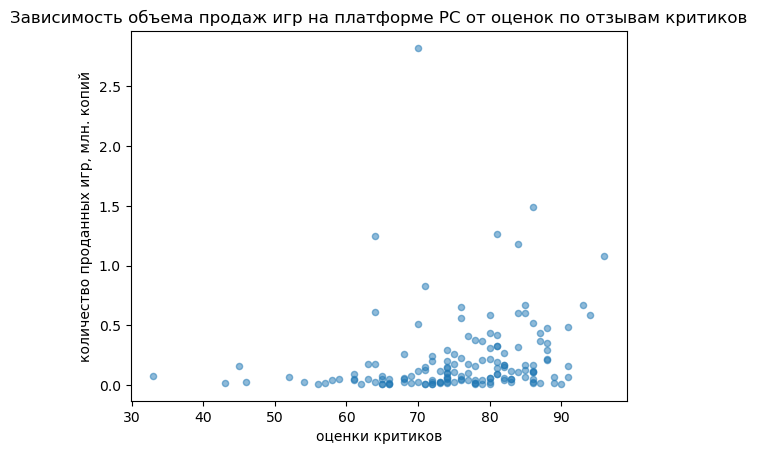

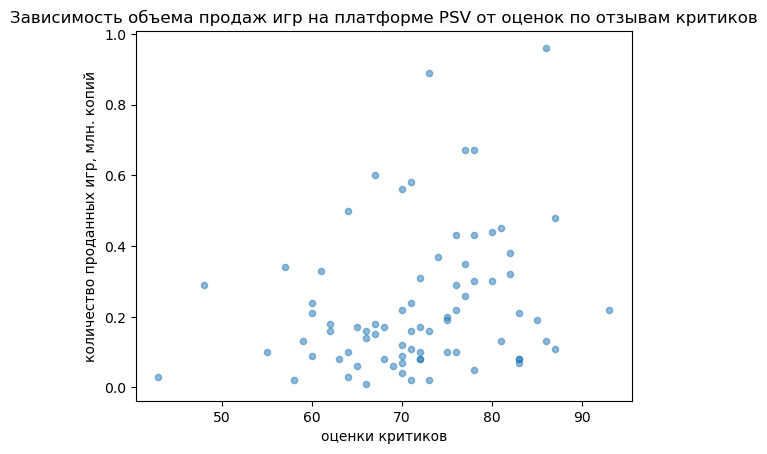

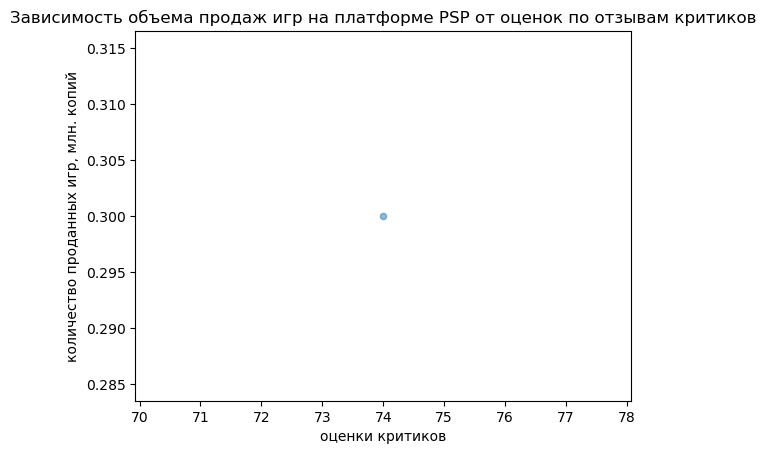

In [33]:
# выведем диаграммы рассеяния по отзывам критиков для всех платформ за период 2013 -2016 гг.
for actual_platform in data_actual_period_corr['platform'].unique():
    data_actual_period_corr.query('platform == @actual_platform') \
.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5) \
.set(title=f'Зависимость объема продаж игр на платформе {actual_platform} от оценок по отзывам критиков', xlabel='оценки критиков', ylabel='количество проданных игр, млн. копий') 

Корреляция между объемами продаж игр и оценкой игр на основе отзывов критиков достаточно слабая.  
Коэффициент корреляции по всем платформам в указанный период находится в диапазоне от 0,20 до 0,42.  
В целом уровень корреляции между объемом продаж игр и оценкой критиков выше по сравнению с корреляцией между объемом продаж игр и оценкой пользователей.  
Это может быть связано с более высоким профессиональным уровнем критиков.

### Распределение игр по жанрам

In [34]:
# сформируем сводную таблицу с группипрвкой количества игровых релизов по жанрам за период с 2013 по 2016 гг.
data_actual_period_genre_count = data_actual_period.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending=False).reset_index()
data_actual_period_genre_count = data_actual_period_genre_count.rename(columns={'name': 'count_games'})
data_actual_period_genre_count

,genre,count_games
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


[Text(0.5, 1.0, 'Доля выпущенных игр разных жанров за 2013-2016 гг.')]

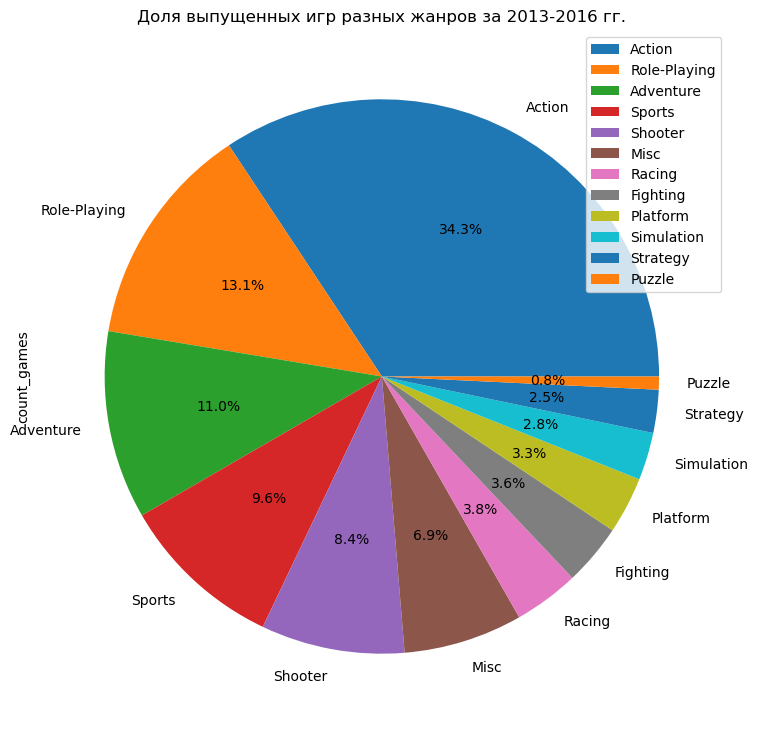

In [35]:
# выведем круговую диагарамму, показывающую доли количества игровых релизов по жанрам в общем объеме релизов за период с 2013 по 2016 гг.
data_actual_period_genre_count.plot(kind='pie', y='count_games', figsize=(9,9), autopct='%1.1f%%', labels = data_actual_period_genre_count['genre']) \
.set(title='Доля выпущенных игр разных жанров за 2013-2016 гг.')

Наиболее популярным жанром по количеству выпущенных игр для игровых платформ является жанр Action. На него приходится 34,3% от общего объема игр, выпущенных за период 2013 -2016 гг.  
Следом по количеству игровых релизов идут игры жанров Role-Playing (13,1%) и Adventure (11,0%).  
Меньше всего было выпущено игр жанров Puzzle (0,8%), Strategy (2,5%) и Simulation (2,8%).

In [36]:
data_actual_period_genre_sales = data_actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()
data_actual_period_genre_sales

,genre,total_sales
0,Action,325.16
1,Shooter,210.82
2,Role-Playing,185.45
3,Sports,136.61
4,Misc,65.93
5,Platform,43.30
6,Fighting,39.40
7,Racing,37.75
8,Adventure,27.03
9,Simulation,24.82


[Text(0.5, 1.0, 'Количество проданных игр по жанрам за период 2013 -2016 гг.'),
 Text(0.5, 0, 'игровой жанр'),
 Text(0, 0.5, 'количество проданных игр, млн. копий')]

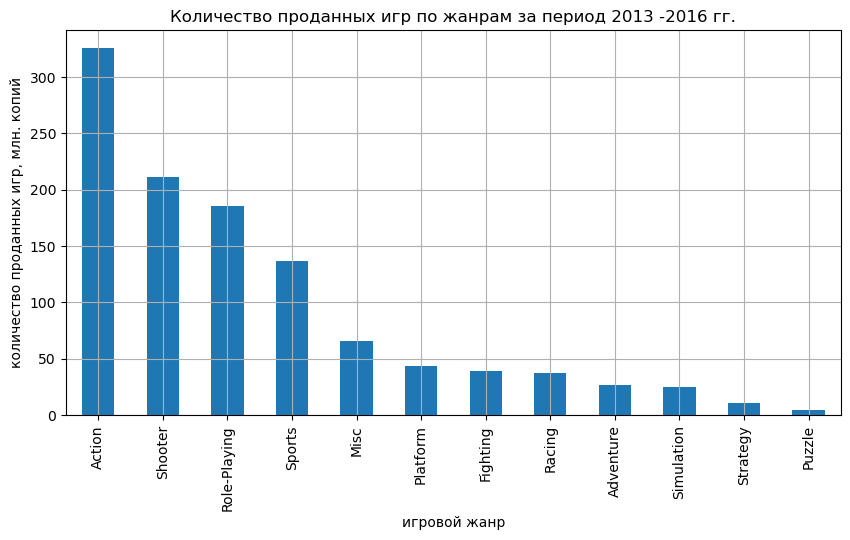

In [37]:
# выведем диаграмму, показывающую количество проданных копий игр по жанрам за период с 2013 по 2016 гг.
data_actual_period_genre_sales.plot(kind='bar', x='genre', y='total_sales', figsize=(10, 5), grid=True, legend=False) \
.set(title='Количество проданных игр по жанрам за период 2013 -2016 гг.', xlabel='игровой жанр', ylabel='количество проданных игр, млн. копий')

[Text(0.5, 1.0, 'Доля проданных игр разных жанров за 2013-2016 гг.')]

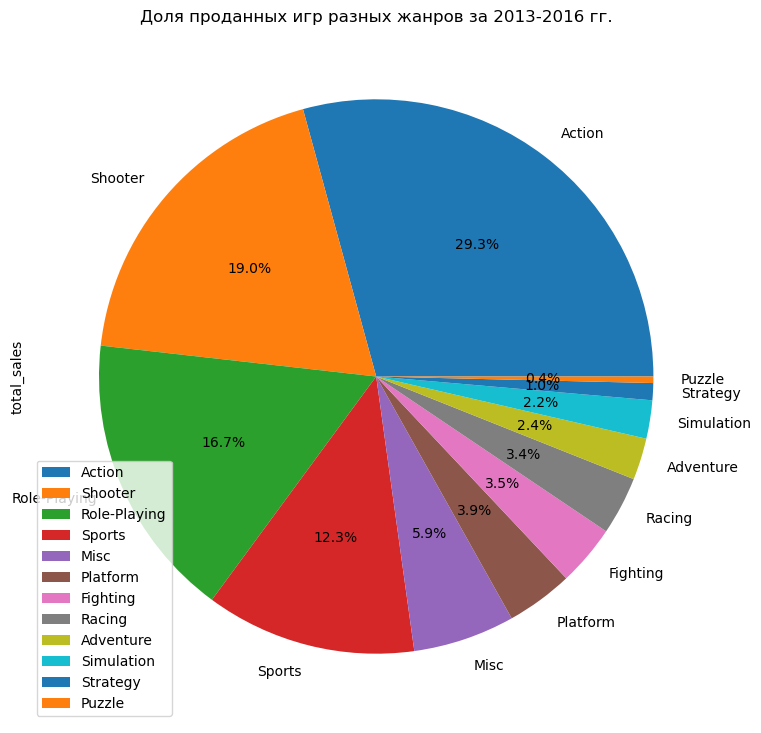

In [38]:
# выведем круговую диагарамму, показывающую долю количества проданных копий игр по жанрам в общем объеме продаж за период с 2013 по 2016 гг.
data_actual_period_genre_sales.plot(kind='pie', y='total_sales', figsize=(9,9), autopct='%1.1f%%', labels = data_actual_period_genre_sales['genre']) \
.set(title='Доля проданных игр разных жанров за 2013-2016 гг.')

Наибольший объем продаж по количеству проданных копий приходится на игры следующих жанров: Action - 29,3% от общего объема продаж за период 2013 -2016 гг., Role-Playing (19,0%) и Adventure (16,7%).  Наименьшим спросом пользуются игры жанров Puzzle (0,4%), Strategy (1,0%) и Simulation (2,2%).

[Text(0.5, 1.0, 'Распределение продаж игр по жанрам за 2013-2016 гг.'),
 Text(0.5, 0, 'жанры'),
 Text(0, 0.5, 'объем продаж, млн. копий'),
 (0.0, 5.0)]

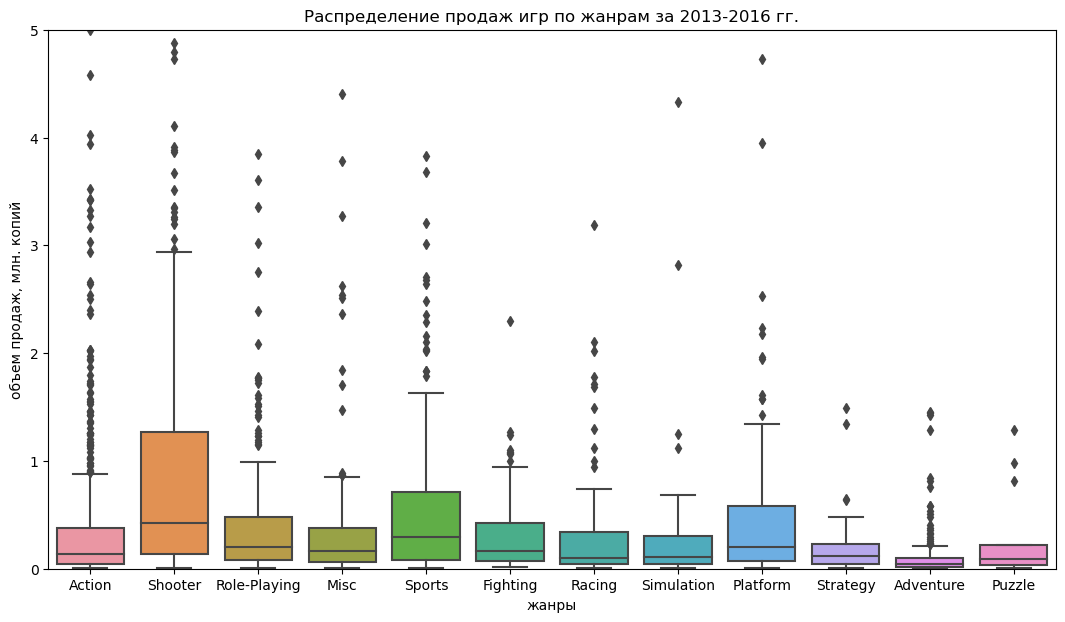

In [39]:

plt.figure(figsize=(13, 7))
sns.boxplot(data=data_actual_period, x='genre', y='total_sales') \
.set(title = 'Распределение продаж игр по жанрам за 2013-2016 гг.', xlabel = 'жанры', ylabel = 'объем продаж, млн. копий', ylim=(0,5))


In [40]:
data_actual_period_genre = data_actual_period.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median']) \
.sort_values(by=('median', 'total_sales'), ascending=False).reset_index()
data_actual_period_genre

,genre,sum,mean,median
,,total_sales,total_sales,total_sales
0,Shooter,210.82,1.127380,0.420
1,Sports,136.61,0.638364,0.290
2,Platform,43.30,0.585135,0.205
3,Role-Playing,185.45,0.635103,0.200
4,Fighting,39.40,0.492500,0.165
5,Misc,65.93,0.425355,0.160
6,Action,325.16,0.424491,0.140
7,Strategy,11.04,0.197143,0.120
8,Simulation,24.82,0.400323,0.105


Прибыльность игры определяется количеством проданных копий. Наиболее прибыльными являются игры жанра Shooter. Среднее количество проданных копий одной игры этого жанра составляет 1,13 млн. копий. Медианное значение - 0,42 млн. копий. Далее по прибыльности идут игры жанра Sports. Среднее значение количества проданных копий составляет 0,64 млн, медианное значение - 0,29 млн.  
В тройку самых прибыльных игр входят игры жанра Platform, среднее значение - 0,59 млн.копий, медиана - 0,21 млн.  
Наименее прибыльными являются игры следующих жанров: Adventure (медианное значение проданных копий одной игры - 0,04 млн.), Puzzle (0.09 млн.), Racing (0,1 млн.).

## Портрет пользователя основных регионов продаж игр

### Самые популярные игровые платформы в разных регионах

In [41]:
# сформируем таблицу, сгруппированную по игровым платформам, в разрезе регионов
data_actual_period.pivot_table(index='platform', values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],\
aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.09,15.96,108.74,48.35,281.75
1,3DS,30.96,67.81,38.20,6.28,204.78
2,PS3,67.81,23.35,63.50,26.77,178.01
3,XOne,51.59,0.34,93.12,14.27,145.39
4,X360,42.52,0.51,81.66,12.11,125.20
5,WiiU,19.85,10.88,29.21,4.69,70.82
6,PSV,6.10,18.59,5.04,3.26,48.32
7,PC,25.36,0.00,11.11,2.96,36.47
8,Wii,5.93,0.05,6.56,1.12,12.59
9,PSP,0.17,3.29,0.00,0.04,6.75


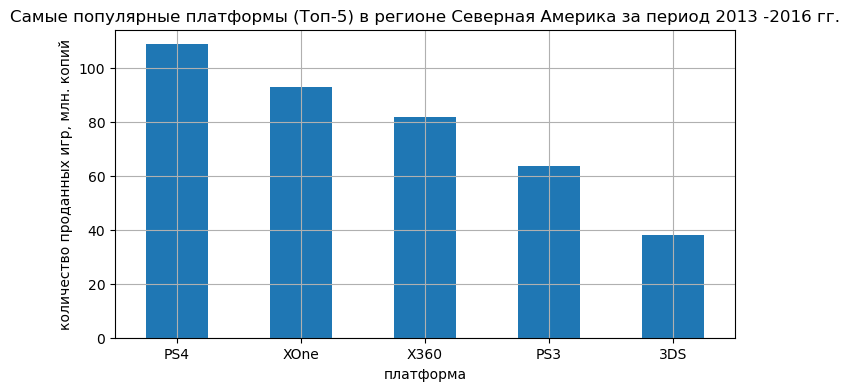

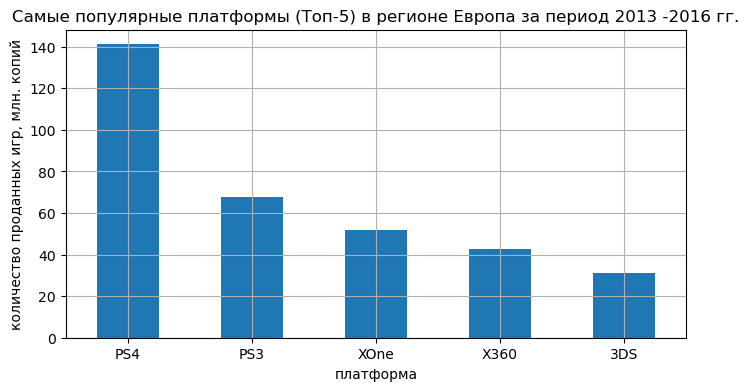

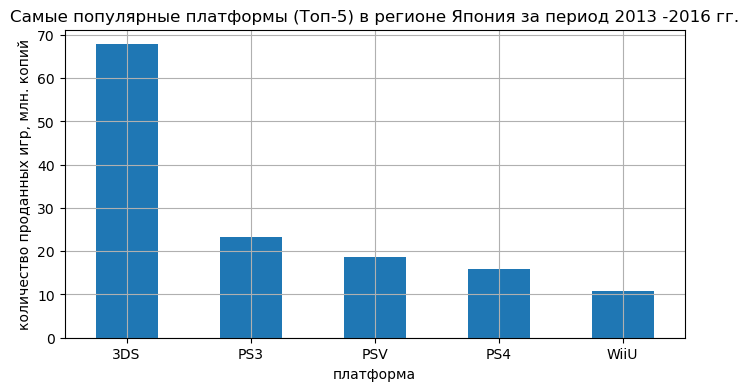

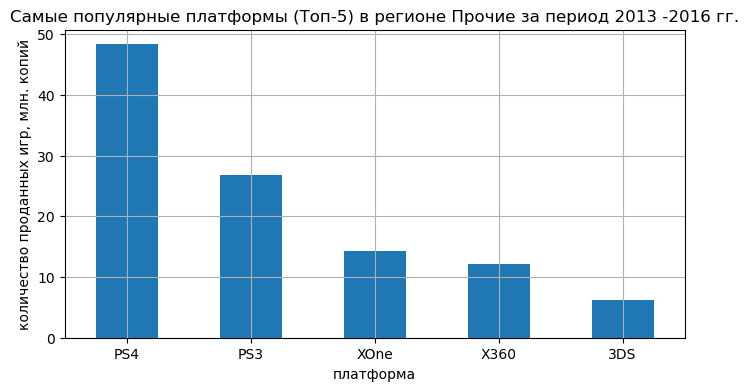

In [42]:
# построим графики, характеризующие популярность игровых платформ по количеству выпущенных для них игр в период с 2013 по 2016 гг., в разных регионах мира
regions_sales = {'na_sales': 'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Прочие'}
for region in regions_sales:
    data_actual_period.pivot_table(index='platform', values= region, aggfunc='sum')\
    .sort_values(by=region, ascending=False).head(5).reset_index() \
    .plot(kind='bar', x='platform', y=region, figsize=(8, 4), grid=True, legend=False, rot=0) \
    .set(title = f'Самые популярные платформы (Топ-5) в регионе {regions_sales[region]} за период 2013 -2016 гг.', xlabel='платформа', ylabel='количество проданных игр, млн. копий')  

Text(0.5, 0, 'игровая платформа')

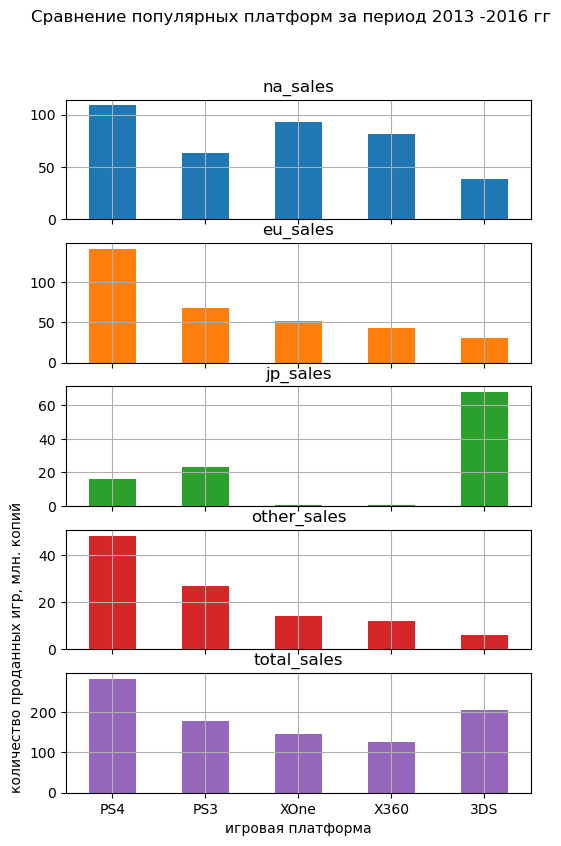

In [43]:
# для большей наглядности построим те же графики с размещением столбцов на одном уровне
data_actual_period.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')\
.sort_values(by=region, ascending=False).head(5).reset_index() \
.plot(subplots=True, kind='bar', x='platform', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], figsize=(6, 9), grid=True, legend=False, rot=0)
plt.suptitle('Сравнение популярных платформ за период 2013 -2016 гг')
plt.ylabel('количество проданных игр, млн. копий', loc='bottom')
plt.xlabel('игровая платформа')

В Северной Америке наиболее популярными игровыми платформами по количеству проданных для них игр, выпущенных в 2013-2016 гг., являются следующие (в порядке убывания популярности): PS4, XOne, X360, PS3, 3DS. В Европе состав Топ-5 игровых платформ такой же, что и в Северной Америке. При этом в Европе с существенным отрывом лидирует PS4, делее идут PS3, Xone, X360, 3DS.  
В Японии ситуация значительно отличается по сравнению с другими регионами. Там самой популярной является платформа 3DS, для которой игр было продано в 3 раза больше по сравнению с количеством игр для PS3, которая располагается на втором месте по популярности. Далее следуют PSV, PS4, WiiU. Платформы PSV и WiiU отсутствуют в списке Топ-5 платформ во всех других регионах.  
Во всех прочих регионах состав платформ и их популярность соответствуют ситуации, наблюдаемой в Европе.

### Самые популярные жанры игр в разных регионах

In [44]:
# сформируем таблицу, сгруппированную по игровым жанрам, в разрезе регионов
data_actual_period.pivot_table(index='genre', values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],\
aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,118.13,40.49,126.05,37.20,325.16
1,Shooter,87.86,6.61,109.74,28.77,210.82
2,Role-Playing,36.97,51.04,46.40,11.48,185.45
3,Sports,60.52,5.41,65.27,19.45,136.61
4,Misc,20.04,9.20,27.49,6.09,65.93
5,Platform,15.58,4.79,18.14,4.12,43.30
6,Fighting,8.55,7.65,15.55,3.56,39.40
7,Racing,20.19,2.30,12.96,4.44,37.75
8,Adventure,8.25,5.82,7.14,2.43,27.03
9,Simulation,10.92,4.52,4.86,1.46,24.82


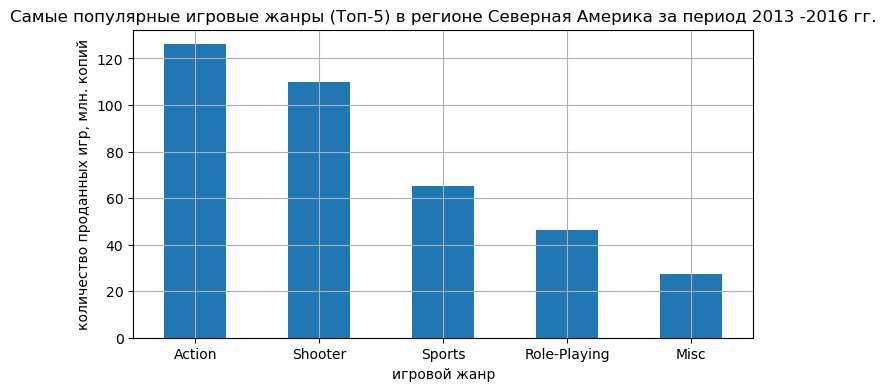

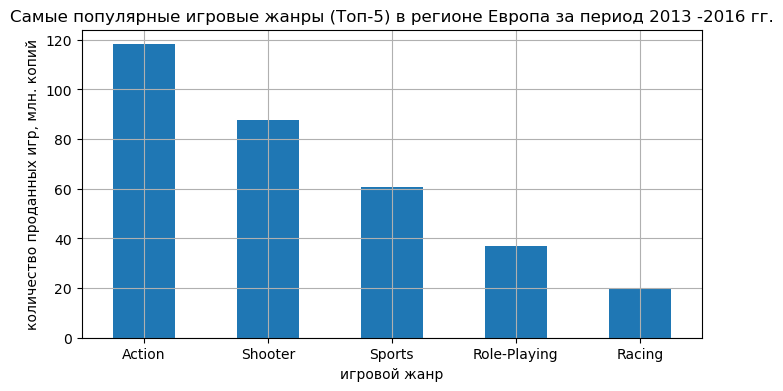

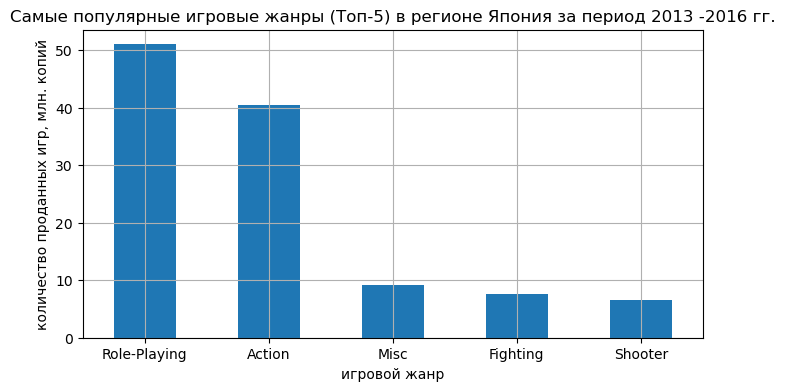

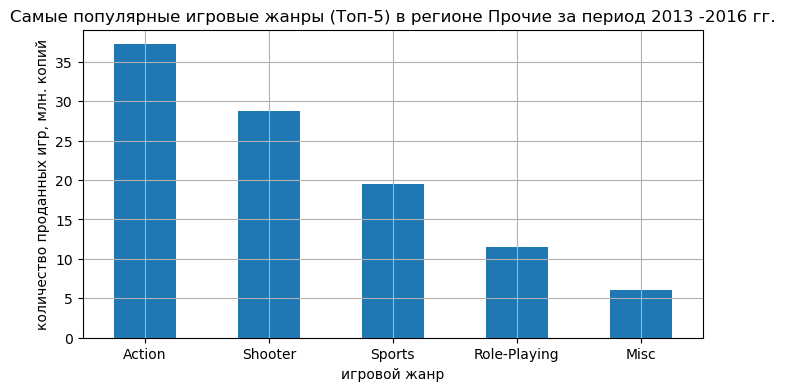

In [45]:
# построим графики, характеризующие популярность игровых жанров по количеству выпущенных игр в период с 2013 по 2016 гг., в разных регионах мира
for region in regions_sales:
    data_actual_period.pivot_table(index='genre', values= region, aggfunc='sum')\
    .sort_values(by=region, ascending=False).head(5).reset_index() \
    .plot(kind='bar', x='genre', y=region, figsize=(8, 4), grid=True, legend=False, rot=0) \
    .set(title = f'Самые популярные игровые жанры (Топ-5) в регионе {regions_sales[region]} за период 2013 -2016 гг.', xlabel='игровой жанр', ylabel='количество проданных игр, млн. копий')

В Северной Америке наиболее популярными игровыми жанрами по количеству проданных копий игр, выпущенных в 2013-2016 гг., являются следующие (в порядке убывания популярности): Action, Shooter, Sports, Role-Playing, Misc. В Европе состав Топ-5 игровых жанров аналогичный, за исключением последнего места, который занимает жанр Racing.  
В Японии первые два места по популярности жанров занимают Role-Playing и Action, которые с существенным отрывом опережают другие жанры - Misc, Fightinng и Shooter.  Жанр Fightinng отсутствует в списке Топ-5 самых популярных жанров во всех других регионах.  
Во всех прочих регионах состав Топ-5 жанров и их популярность соответствуют ситуации, наблюдаемой в Северной Америке.

In [46]:
# создадим словарь с описанием рейтингов игр, преобразуем в датафрейм и добавим данные в имеющуюся таблицу в виде отдельного столбца
rating_dictionary = [{'EC':'Early childhood (3+)',
                      'E':'Everyone (6+)',
                      'E10+':'Everyone 10 and older (10+)',
                      'T':'Teen (13+)',
                      'M':'Mature (17+)',
                      'AO':'Adults Only (18+)',
                      'K-A':'Kids to Adults (6+)',
                      'RP':'Rating Pending',
                      'without rating':'Without rating',
                      'unknown':'Unknown'
}]
rating_memo = pd.DataFrame(rating_dictionary).transpose().reset_index()
rating_memo.columns = ['rating','rating_description']
data_actual_period = data_actual_period.merge(rating_memo)
data_actual_period.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_description
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,18.07,Mature (17+)
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,14.92,Mature (17+)
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,11.03,Mature (17+)
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,9.37,Mature (17+)
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,8.49,Mature (17+)
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,6.57,Mature (17+)
6,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,6.28,Mature (17+)
7,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.15,Mature (17+)
8,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.00,Mature (17+)
9,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,4.79,Mature (17+)


In [47]:
# сформируем таблицу, сгруппированную по рейтингам игр, в разрезе регионов
data_actual_period.pivot_table(index='rating_description', values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],\
aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

,rating_description,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Mature (17+),145.32,14.11,165.21,47.04,338.75
1,Unknown,78.91,85.05,89.42,23.46,338.43
2,Everyone (6+),83.36,15.14,79.05,22.61,192.69
3,Teen (13+),41.95,20.59,49.79,14.29,132.92
4,Everyone 10 and older (10+),42.69,5.89,54.24,12.57,108.71


[Text(0.5, 1.0, 'Доли проданных игр с разными рейтингами за 2013 - 2016 гг.')]

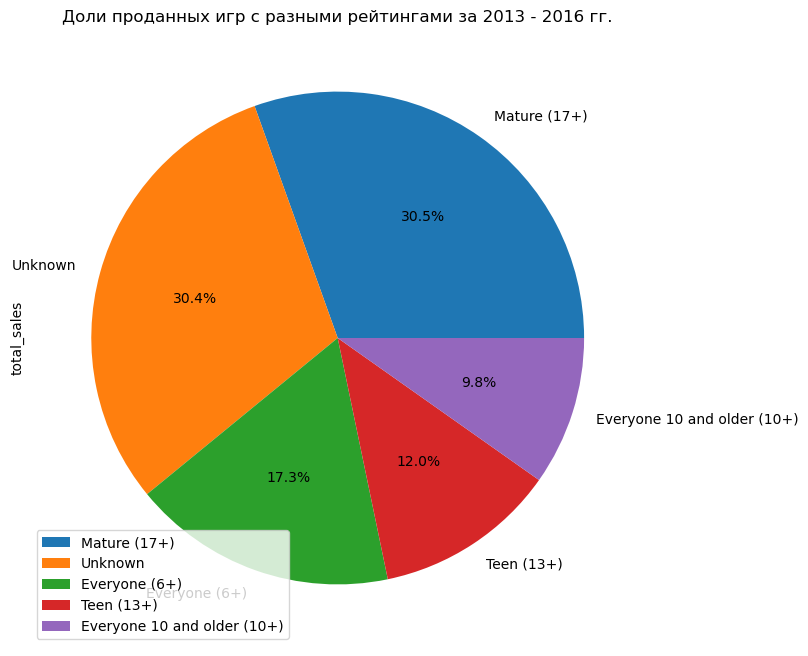

In [48]:
# построим график, характеризующий объемы продаж игр с разными рейтингами за период 2013 -2016 гг.
data_actual_period.pivot_table(index='rating_description', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()\
.plot(kind='pie', y='total_sales', figsize=(8,8), autopct='%1.1f%%', labels = data_actual_period['rating_description'].unique()) \
.set(title='Доли проданных игр с разными рейтингами за 2013 - 2016 гг.')

Самыми продаваемыми играми, выпущенными в 2013-2016 гг., являются игры с рейтингом Mature (17+). Их доля в общем объеме продаж составляет 30,5%.  
Такой же объем продаж имеют игры без рейтинга (30,4%). Далее по объему продаж следуют игры с рейтингом Everyone (6+) - 17,3%. Teen (13+) - 12,0%, Everyone (10+) - 9,8%.  
Большой объем продаж игр, не имеющих рейтинга, может быть связан с тем, что в разных регионах принята своя система рейтинга игр по возрасту, отличная от системы рейтингования ESRB.

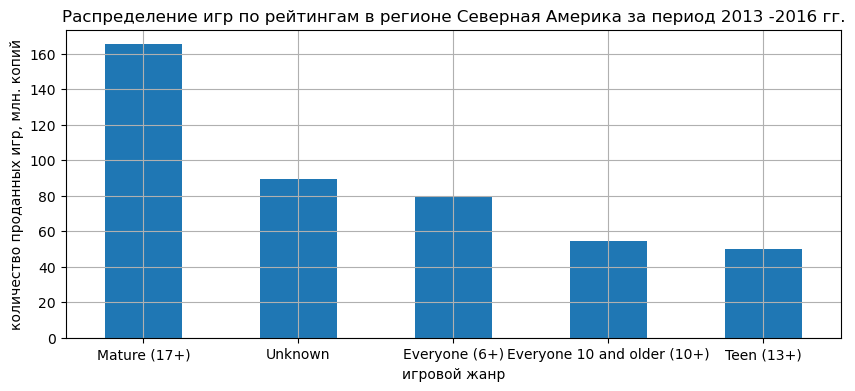

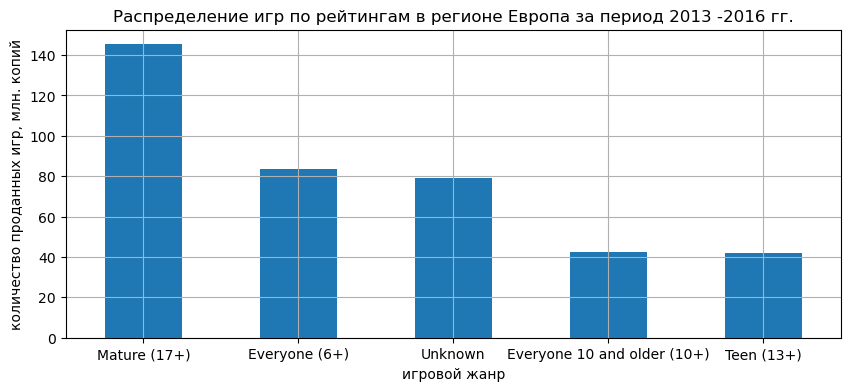

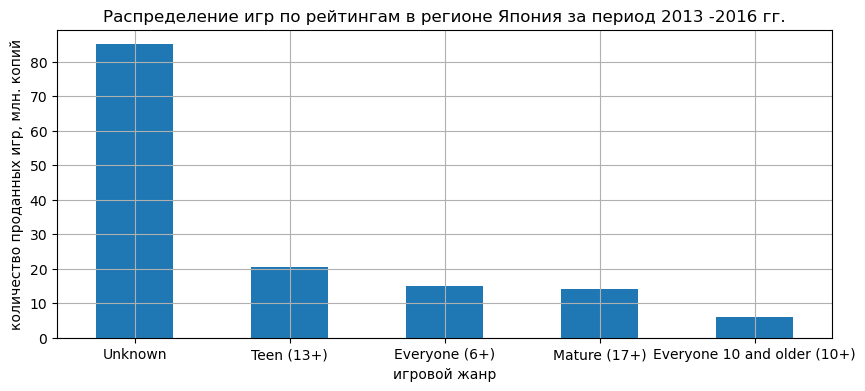

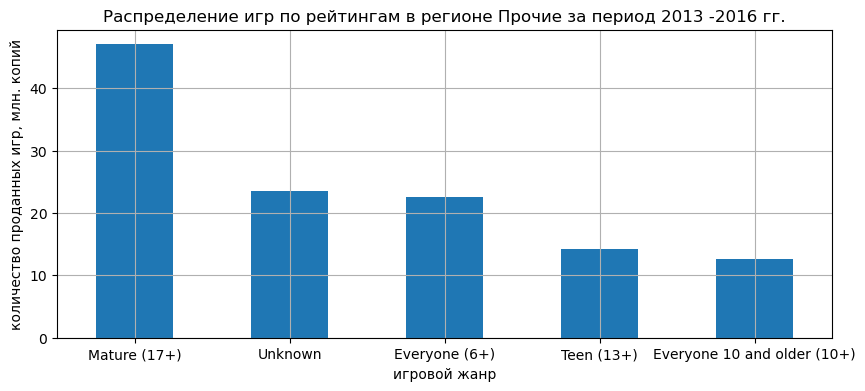

In [49]:
# построим графики, характеризующие популярность игр с разными рейтингами, выпущенных в период с 2013 по 2016 гг., в разных регионах мира
for region in regions_sales:
    data_actual_period.pivot_table(index='rating_description', values= region, aggfunc='sum')\
    .sort_values(by=region, ascending=False).reset_index() \
    .plot(kind='bar', x='rating_description', y=region, figsize=(10, 4), grid=True, legend=False, rot=0) \
    .set(title = f'Распределение игр по рейтингам в регионе {regions_sales[region]} за период 2013 -2016 гг.', xlabel='игровой жанр', ylabel='количество проданных игр, млн. копий')

В Северной Америке наибольшей популярностью пользуются игры с рейтингом M(17+) и без рейтинга. Далее по поулярности следуют игры с категорией E(6+), E10+ и T(13+).  
В Европе ситуация похожая, только там количество продаж игр с рейтингом E(6+) опережает продажи игр без рейтинга.
В Японии самыми популярными являются игры без рейтинга, продажи которых превышают объемы продаж всех остальных игр в Топ-5. Следом по популярности идут игры с рейтингом T(13+) и E(6+). Менее популярны игры с рейтингом M(17+) и E10+.  
В прочих регионах ситуация схожа с той, что наблюдается в Северной Америке и Европе.

### Продажи игр без рейтинга

[Text(0.5, 1.0, 'Продажи игр без рейтинга по регионам за период 2013-2016 гг.'),
 Text(0.5, 0, 'год выхода'),
 Text(0, 0.5, 'количество проданных игр, млн. копий')]

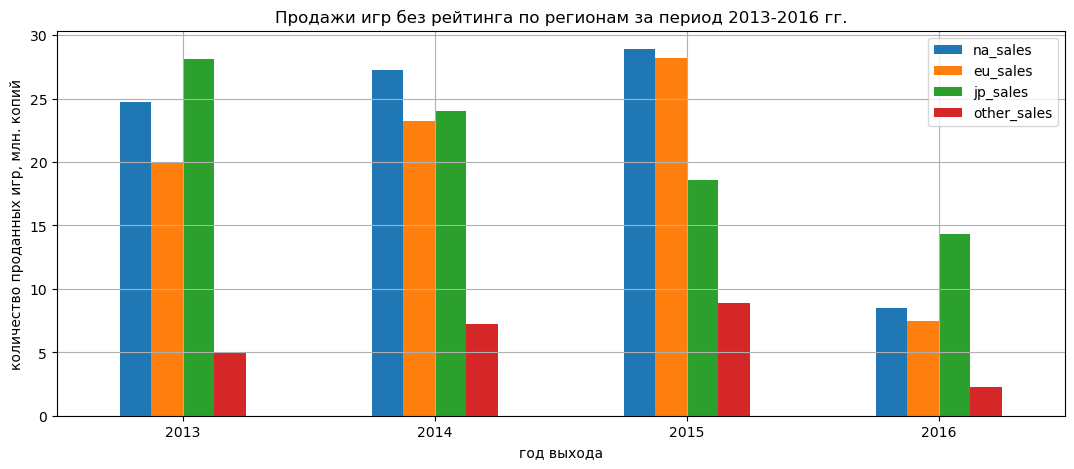

In [50]:
# построим график, характеризующий объем продаж игр без рейтинга по годам их выпуска во всех регионах
data_actual_period.query('rating == "unknown"').pivot_table(index='year_of_release', values= ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],\
aggfunc='sum').sort_values('year_of_release').reset_index()\
.plot(kind='bar', x='year_of_release', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], figsize=(13, 5), grid=True, rot=0) \
.set(title = 'Продажи игр без рейтинга по регионам за период 2013-2016 гг.', xlabel='год выхода', ylabel='количество проданных игр, млн. копий')

Объем продаж игр без рейтинга, выпущенных в 2013-2016 гг., на протяжении указанного периода растет в Северной Америке, Европе и прочих регионах, кроме Японии.  
При этом наблюдается снижение продаж таких игр в Японии. Существенный объем продаж игр без рейтинга связан с тем, что в составе данных присутствуют только рейтинги, присвоенные организацией Entertainment Software Rating Board (ESRB). Всего же в мире имеется порядка 15 официальных организаций, которые определяют возрастные рейтинги компьютерных игр. Так в Европе этим занимается Pan European Game Information (PEGI), в Германии - Unterhaltungssoftware Selbstkontrolle (USK), в Японии - Computer Entertainment Rating Organization (CERO), в Австралии - Australian Government Classification Board (AGCB), в России - Russian Age Rating System (RARS). Желательно наличие более полной информации о возрастных рейтингах.

Вывод: портрет среднего пользователя игр в Северной Америке, Европе и прочих регионах выглядит следующим образом: играет в игры жанра Action с рейтингом Mature (17+) на платформе Sony Playstation 4.  
Портрет среднего пользователя игр в Японии: играет в игры жанра Role-Playing без рейтинга на платформе Nintendo 3DS.  
Можно сделать вывод, что игровой рынок Японии является самым специфичным в плане популярности игровых платформ, а также игр к ним по жанрам и рейтингам. При этом в Японии существует собственная организация, определяющая возрастные рейтинги для игр - CERO.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проведения теста сформулируем гипотезы:  
нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны  
альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны  
Для проверки гипотезы применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, которые являются независимыми.

In [51]:
# выберем значения столбца 'user_score' для платформ Xbox One и PC. Значения не должны быть пустыми
user_score_xbox_one = data_actual_period.query('platform == "XOne" and user_score.notna()')['user_score']
user_score_PC = data_actual_period.query('platform == "PC" and user_score.notna()')['user_score']
# уровень статистической значимости
alpha = 0.05
results = st.ttest_ind(user_score_xbox_one, user_score_PC)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


Значение p-value составляет 0,085, показывает вероятность случайно получить различие между средними оценками пользователей игр, выпущенных для платформ Xbox One и PC.  
Данное значение превышает установленный нами уровень статистической значимости (0,05). Поэтому нулевая гипотеза не отвергается.  
Вывод: средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Для проведения теста сформулируем гипотезы:  
нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.  
альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны  
Для проверки гипотезы применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, которые являются независимыми.

In [52]:
# выберем значения столбца 'user_score' для платформ Xbox One и PC. Значения не должны быть пустыми
user_score_action = data_actual_period.query('genre == "Action" and user_score.notna()')['user_score']
user_score_sports = data_actual_period.query('genre == "Sports" and user_score.notna()')['user_score']
# уровень статистической значимости
alpha = 0.05
results = st.ttest_ind(user_score_action, user_score_sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


Значение p-value составляет значительно меньшую величину по сравнению с установленным нами уровнем статистической значимости (0,05).  
Вероятность того, что средние пользовательские рейтинги жанров Action и Sports равны, очень низкая. Поэтому нулевая гипотеза отвергается.  
Вывод: средние пользовательские рейтинги жанров Action и Sports не равны.

## Вывод

В целях проведения исследования мы провели предобработку исходных данных: определили пропущенные значения в исходной таблице, заполнили пропущенные значения, где это было необходимо, изменили типы данных в некоторых столбцах таблицы, привели названия столбцов к строчному регистру, проверили данные на наличие явных дубликатов, удалили строки, в которых имеются пропущенные значения в столбцах с названием игры и жанра.  
Были рассчитаны и добавлены в таблицу дополнительные поля, необходимые для проведения анализа.  
Рост рынка игр для игровых платформ начался в середине 1990-х годов. Наибольшее количество игр выпускалось в период с 2006 г. по 2011 г., в этот период выпускалось более 1000 игр ежегодно. Пик пришелся на 2008-2009 г., в которые выпускалось более 1400 игр. После этого, в период с 2012 по 2016 гг. ежегодное количество релизов снижается и колеблется в районе 500-600.
Наибольшее количество игр было продано для следующих платформ: Sony PlayStation 2, Nintendo DS, Microsoft Xbox 360, Nintendo Wii, Sony PlayStation 3, Sony PlayStation. Для каждой из данных платформ количество проданных игр за весь анализируемый период превысило 800 млн. копий. Для 11-ти платформ количество проданных копий игр составило от 200 до 400 млн., для остальных менее 200 млн. копий.  
Средний срок жизни игровой платформы составляет около 10 лет. Все платформы, для которых было продано наибольшее количество копий игр за весь период анализа, либо закончили свой жизненный цикл, либо подошли к его окончанию.  
При этом рост количества проданных игр для одной платформы продолжается в течение 4-5 лет., далее следует примерно таклй же по продолжительности спад продаж. Поэтому, для прогнозирования объема продаж игр для разных платформ на 2017 год, использовались данные за период с 2013 по 2016 гг. (4 года).  
По объемам продаж игр, выпущенных за последние 4 года (2013 - 2016 гг.), лидирующие позиции занимают платформы Sony PlayStation 4, Nintendo 3DS, Sony PlayStation 3, Microsoft XOne.  
Наименьшее количество проданных игр приходится на платформы Nintendo Wii, Sony PSP, Nintendo DS.  
Объемы продаж игр для всех платформ снижаются в 2016 году по сравнению с предыдущим годом.   
Данное обстоятельство может быть связано с тем, что 2016 год является последним представленным периодом, за который имеются данные о продажах. При этом, возможно, что игры, вышедшие в 2016 году, еще могут продаваться в последующих периодах. Также следует учитывать рост популярности игр, выпускаемых для операционных систем, применяемых в мобильных устройствах (android, iOS). Информация о таких играх отсутствует.
При этом продаж игр для платформ PSP и DS в 2016 году не было. Для платформ PS3, X360, Wii продажи были минимальными. Для остальных платформ период снижения составляет: PS4, XOne - 1 год, WiiU, PSV, PC - 2 года, 3DS - 3 года.  
Наибольший объем наблюдается у игр, выпущенных для платформ 3DS, PS4 и Xone. Несмотря на снижение продаж в 2016 году, пик продаж игр для данных платформ прошел сравнительно недавно. Это достаточно молодые платформы, у которых наиболее сильный по сравнению с остальными.  
Исходя из объема продаж за 2016 год и продолжительности снижения объемов продаж, наиболее привлекательно для реализации игр в 2017 г. выглядят платформы Sony Playstation4 и Microsoft Xbox One.  
Наибольшее среднее значение проданных копий одной игры наблюдается у игр для платформ: X360 - 0,67 млн, копий, PS4 - 0,72 млн., 3DS - 0,68 млн. Наибольшее медианное значение наблюдается у игр для платформ: PS3 и WiiU - 0,22 млн. копий, X360 - 0,25 млн., PS4 и Xone - 0,2 млн.  
Корреляция между объемами продаж игр и оценкой игр на основе отзывов пользователей, слабая либо вовсе отсутствует. Коэффициент корреляции по всем платформам в указанный период находится в диапазоне от -0,11 до 0,4.  
Корреляция между объемами продаж игр и оценкой игр на основе отзывов критиков также достаточно слабая. Коэффициент корреляции по всем платформам в указанный период находится в диапазоне от 0,20 до 0,42. В целом уровень корреляции между объемом продаж игр и оценкой критиков выше по сравнению с корреляцией между объемом продаж игр и оценкой пользователей. Это может быть связано с более высоким профессиональным уровнем критиков в игровой индустрии.  
Наиболее популярным жанром по количеству выпущенных игр для игровых платформ является жанр Action. На него приходится 34,3% от общего объема игр, выпущенных за период 2013 -2016 гг. Следом по количеству игровых релизов идут игры жанров Role-Playing (13,1%) и Adventure (11,0%). Меньше всего было выпущено игр жанров Puzzle (0,8%), Strategy (2,5%) и Simulation (2,8%).  
Наибольший объем продаж по количеству проданных копий приходится на игры следующих жанров: Action - 29,3% от общего объема продаж за период 2013 -2016 гг., Role-Playing (19,0%) и Adventure (16,7%).  Наименьшим спросом пользуются игры жанров Puzzle (0,4%), Strategy (1,0%) и Simulation (2,2%).  
Прибыльность игры определяется количеством проданных копий. Наиболее прибыльными являются игры жанра Shooter. Среднее количество проданных копий одной игры этого жанра составляет 1,13 млн. копий, медианное значение - 0,42 млн. копий. Далее по прибыльности идут игры жанра Sports. Среднее значение количества проданных копий составляет 0,64 млн, медианное значение - 0,29 млн.  
В тройку самых прибыльных игр входят игры жанра Platform, среднее значение - 0,59 млн.копий, медиана - 0,21 млн.  
Наименее прибыльными являются игры следующих жанров: Adventure (медианное значение проданных копий одной игры - 0,04 млн.), Puzzle (0.09 млн.), Racing (0,1 млн.).  
В Северной Америке наиболее популярными игровыми платформами по количеству проданных для них игр, выпущенных в 2013-2016 гг., являются следующие (в порядке убывания популярности): PS4, XOne, X360, PS3, 3DS. В Европе состав Топ-5 игровых платформ такой же, что и в Северной Америке. При этом в Европе с существенным отрывом лидирует PS4, далее идут PS3, Xone, X360, 3DS.  
В Японии ситуация значительно отличается по сравнению с другими регионами. Там самой популярной является платформа 3DS, для которой игр было продано в 3 раза больше по сравнению с количеством игр для PS3, которая располагается на втором месте по популярности. Далее следуют PSV, PS4, WiiU. Во всех прочих регионах состав платформ и их популярность соответствуют ситуации, наблюдаемой в Европе.  
Таким образом, во всех регионах наиболее популярными являются игровые платформы производства компаний Sonу и Microsoft. В Японии предпочтения отдаются разработкам отечественных производителей – Sony и Nintendo.  
В Северной Америке наиболее популярными игровыми жанрами по количеству проданных копий игр, выпущенных в 2013-2016 гг., являются следующие (в порядке убывания популярности): Action, Shooter, Sports, Role-Playing, Misc. В Европе состав Топ-5 игровых жанров аналогичный, за исключением последнего места, который занимает жанр Racing.  
В Японии первые два места по популярности жанров занимают Role-Playing и Action, которые с существенным отрывом опережают другие жанры - Misc, Fightinng и Shooter.  Жанр Fightinng отсутствует в списке Топ-5 самых популярных жанров во всех других регионах.  
Во всех прочих регионах состав Топ-5 жанров и их популярность соответствуют ситуации, наблюдаемой в Северной Америке.  
Самыми продаваемыми играми, выпущенными в 2013-2016 гг., являются игры с рейтингом Mature (17+). Их доля в общем объеме продаж составляет 30,5%.  
Такой же объем продаж имеют игры без рейтинга (30,4%). Далее по объему продаж следуют игры с рейтингом Everyone (6+) - 17,3%. Teen (13+) - 12,0%, Everyone (10+) - 9,8%.  
Большой объем продаж игр, не имеющих рейтинга, может быть связан с тем, что в разных регионах принята своя система рейтинга игр по возрасту, отличная от системы рейтингования ESRB.  
В Северной Америке наибольшей популярностью пользуются игры с рейтингом M(17+) и без рейтинга. Далее по популярности следуют игры с категорией E(6+), E10+ и T(13+).  
В Европе ситуация похожая, только там количество продаж игр с рейтингом E(6+) опережает продажи игр без рейтинга.  
В Японии самыми популярными являются игры без рейтинга, продажи которых превышают объемы продаж всех остальных игр в Топ-5. Следом по популярности идут игры с рейтингом T(13+) и E(6+). Менее популярны игры с рейтингом M(17+) и E10+.  
В прочих регионах ситуация схожа с той, что наблюдается в Северной Америке и Европе.
Объем продаж игр без рейтинга, выпущенных в 2013-2016 гг., на протяжении указанного периода растет в Северной Америке, Европе и прочих регионах, кроме Японии.  
При этом наблюдается снижение продаж таких игр в Японии. Существенный объем продаж игр без рейтинга связан с тем, что в составе данных присутствуют только рейтинги, присвоенные организацией Entertainment Software Rating Board (ESRB). Всего же в мире имеется порядка 15 официальных организаций, которые определяют возрастные рейтинги компьютерных игр. 
Портрет среднего пользователя игр в Северной Америке, Европе и прочих регионах выглядит следующим образом: играет в игры жанра Action с рейтингом Mature (17+) на платформе Sony Playstation 4.  
Портрет среднего пользователя игр в Японии: играет в игры жанра Role-Playing без рейтинга на платформе Nintendo 3DS.  
Можно сделать вывод, что игровой рынок Японии является самым специфичным в плане популярности игровых платформ, а также игр к ним по жанрам и рейтингам. При этом в Японии существует собственная организация, определяющая возрастные рейтинги для игр - CERO.
Провели проверку гипотез, по результатам которой сделаны следующие выводы:  
Средние пользовательские рейтинги платформ Xbox One и PC равны.   
Средние пользовательские рейтинги жанров Action и Sports не равны.  
По результатам проведенного анализа можно сделать вывод, что в 2017 году наиболее перспективными в плане продаж будут игры, выпущенные для платформ Sony Playstation4 и Microsoft Xbox One (для Японии – Nintendo 3DS).  
Наиболее популярные игровые жанры по объемам продаж- Action, Shooter, Sports, Role-Playing.  
Наиболее прибыльными являются игры жанра Shooter, Sports, и Platform.  
Объемы продаж игр не зависят от оценок, составленных на основе отзывов пользователей. При этом корреляция между объемами продаж игр и оценкой игр на основе отзывов критиков выше.   
Самыми продаваемыми играми являются игры с рейтингом Mature (17+), Everyone (6+). В Японии больше всего продается игр без рейтинга ESRB.  
Для более точного определения популярности игр в разрезе рейтингов по возрасту, необходимо предоставление более полной информации о рейтингах продаваемых игр, в том числе присвоенных другими национальными и международными организациями.  
Также можно провести анализ рынка игр для мобильных устройств, который растет быстрыми темпами.